In [37]:
import pandas as pd

df_1014 = pd.read_excel("2010-2014IPD-OPD-Deaths.xls", header=1)
df_1519 = pd.read_excel("2015-2019IPD-OPD-Deaths.xls", header=1)
df_2025 = pd.read_excel("2020-2025IPD-OPD-Deaths.xls", header=1)

print(df_1014.head())
print(df_1519.head())
print(df_2025.head())

     orgunitlevel1      orgunitlevel2 orgunitlevel3  \
0  MOH MALAWI Govt  Central West Zone  Lilongwe-DHO   
1  MOH MALAWI Govt  Central West Zone  Lilongwe-DHO   
2  MOH MALAWI Govt  Central West Zone  Lilongwe-DHO   
3  MOH MALAWI Govt  Central West Zone  Lilongwe-DHO   
4  MOH MALAWI Govt  Central West Zone  Lilongwe-DHO   

                         orgunitlevel4                 organisationunitname  \
0  African Bible College Health Centre  African Bible College Health Centre   
1  African Bible College Health Centre  African Bible College Health Centre   
2  African Bible College Health Centre  African Bible College Health Centre   
3  African Bible College Health Centre  African Bible College Health Centre   
4  African Bible College Health Centre  African Bible College Health Centre   

      periodname  NMCP IPD Confirmed Malaria Cases  \
0   January 2014                              67.0   
1  February 2014                              20.0   
2     March 2014                

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns


In [39]:
df_merged_incidence = pd.concat([df_1014, df_1519,df_2025], ignore_index = True)
print(df_merged_incidence.head())
print(df_merged_incidence.shape)

     orgunitlevel1      orgunitlevel2 orgunitlevel3  \
0  MOH MALAWI Govt  Central West Zone  Lilongwe-DHO   
1  MOH MALAWI Govt  Central West Zone  Lilongwe-DHO   
2  MOH MALAWI Govt  Central West Zone  Lilongwe-DHO   
3  MOH MALAWI Govt  Central West Zone  Lilongwe-DHO   
4  MOH MALAWI Govt  Central West Zone  Lilongwe-DHO   

                         orgunitlevel4                 organisationunitname  \
0  African Bible College Health Centre  African Bible College Health Centre   
1  African Bible College Health Centre  African Bible College Health Centre   
2  African Bible College Health Centre  African Bible College Health Centre   
3  African Bible College Health Centre  African Bible College Health Centre   
4  African Bible College Health Centre  African Bible College Health Centre   

      periodname  NMCP IPD Confirmed Malaria Cases  \
0   January 2014                              67.0   
1  February 2014                              20.0   
2     March 2014                

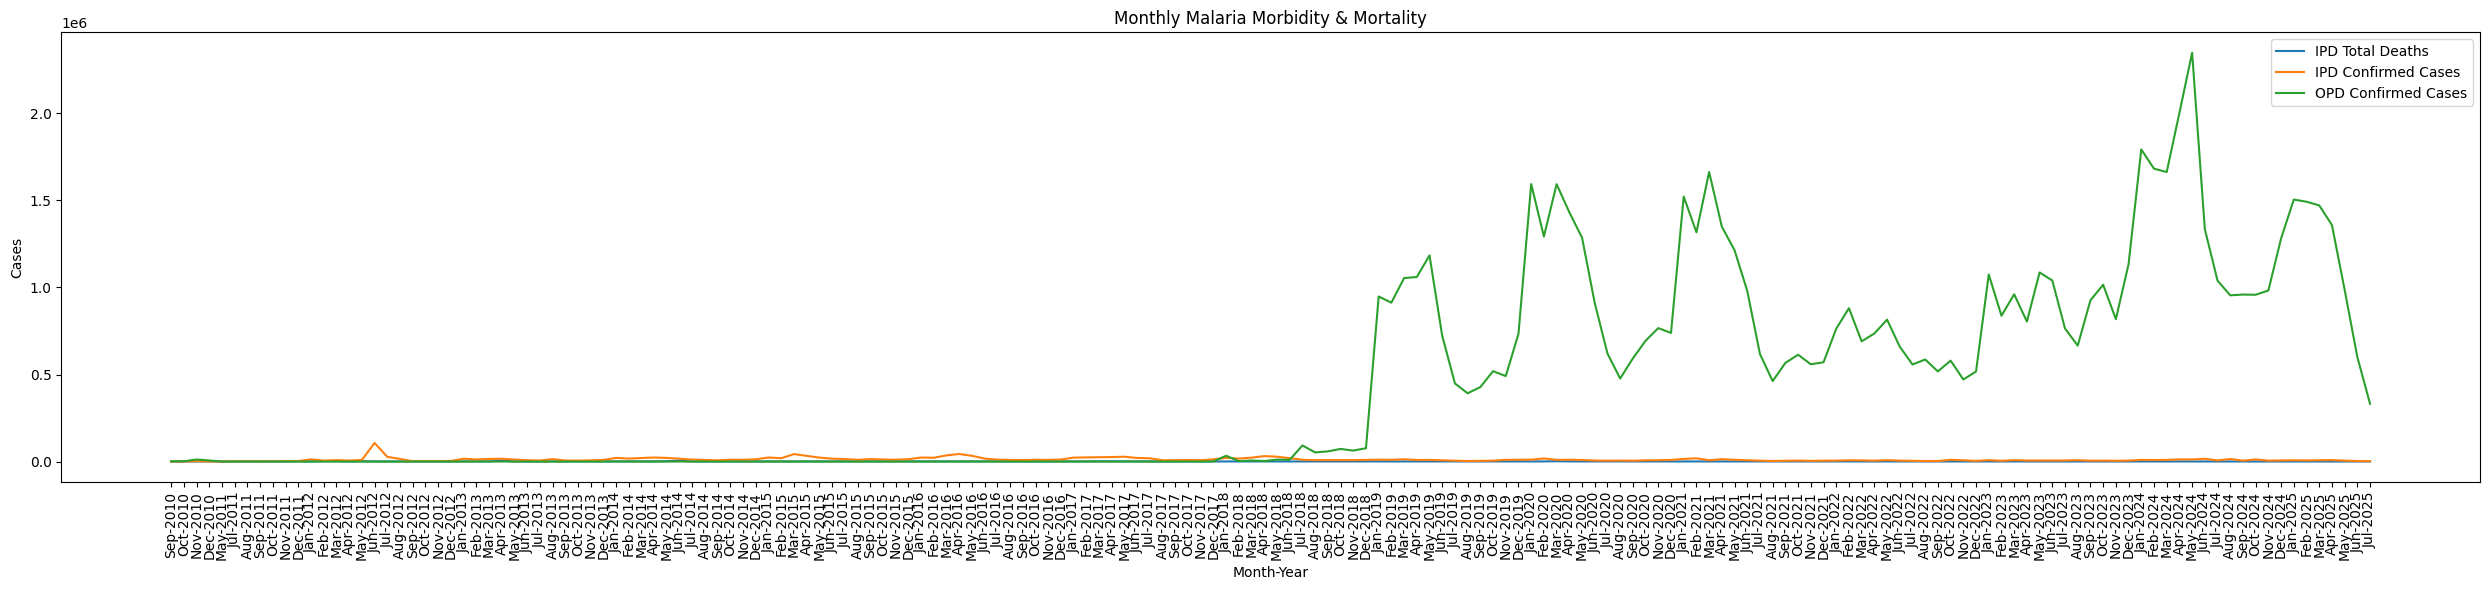

In [40]:


# Converting the column 'periodname' to datetime
df_merged_incidence['date_col'] = pd.to_datetime(df_merged_incidence['periodname'], format='%B %Y')


# Extract Year and Month name
df_merged_incidence['Year'] = df_merged_incidence['date_col'].dt.year
df_merged_incidence['Month'] = df_merged_incidence['date_col'].dt.strftime('%b')  # Jan, Feb, ...
df_merged_incidence['Month_Num'] = df_merged_incidence['date_col'].dt.month       # keep for sorting


monthly_cases = (
    df_merged_incidence
    .groupby(['Year', 'Month_Num', 'Month'], as_index=False)
    .sum(numeric_only=True)
    .sort_values(['Year', 'Month_Num'])
)


monthly_cases['YearMonth'] = monthly_cases['Month'] + '-' + monthly_cases['Year'].astype(str)

plt.figure(figsize=(25,6))

plt.plot(monthly_cases["YearMonth"], monthly_cases["NMCP IPD Total Malaria Deaths"], label="IPD Total Deaths")
plt.plot(monthly_cases["YearMonth"], monthly_cases["NMCP IPD Confirmed Malaria Cases"], label="IPD Confirmed Cases")
plt.plot(monthly_cases["YearMonth"], monthly_cases["NMCP OPD Confirmed Malaria Cases"], label="OPD Confirmed Cases")

plt.title("Monthly Malaria Morbidity & Mortality")
plt.xlabel("Month-Year")
plt.ylabel("Cases")
plt.legend()

# Rotate x-axis labels for readability
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()



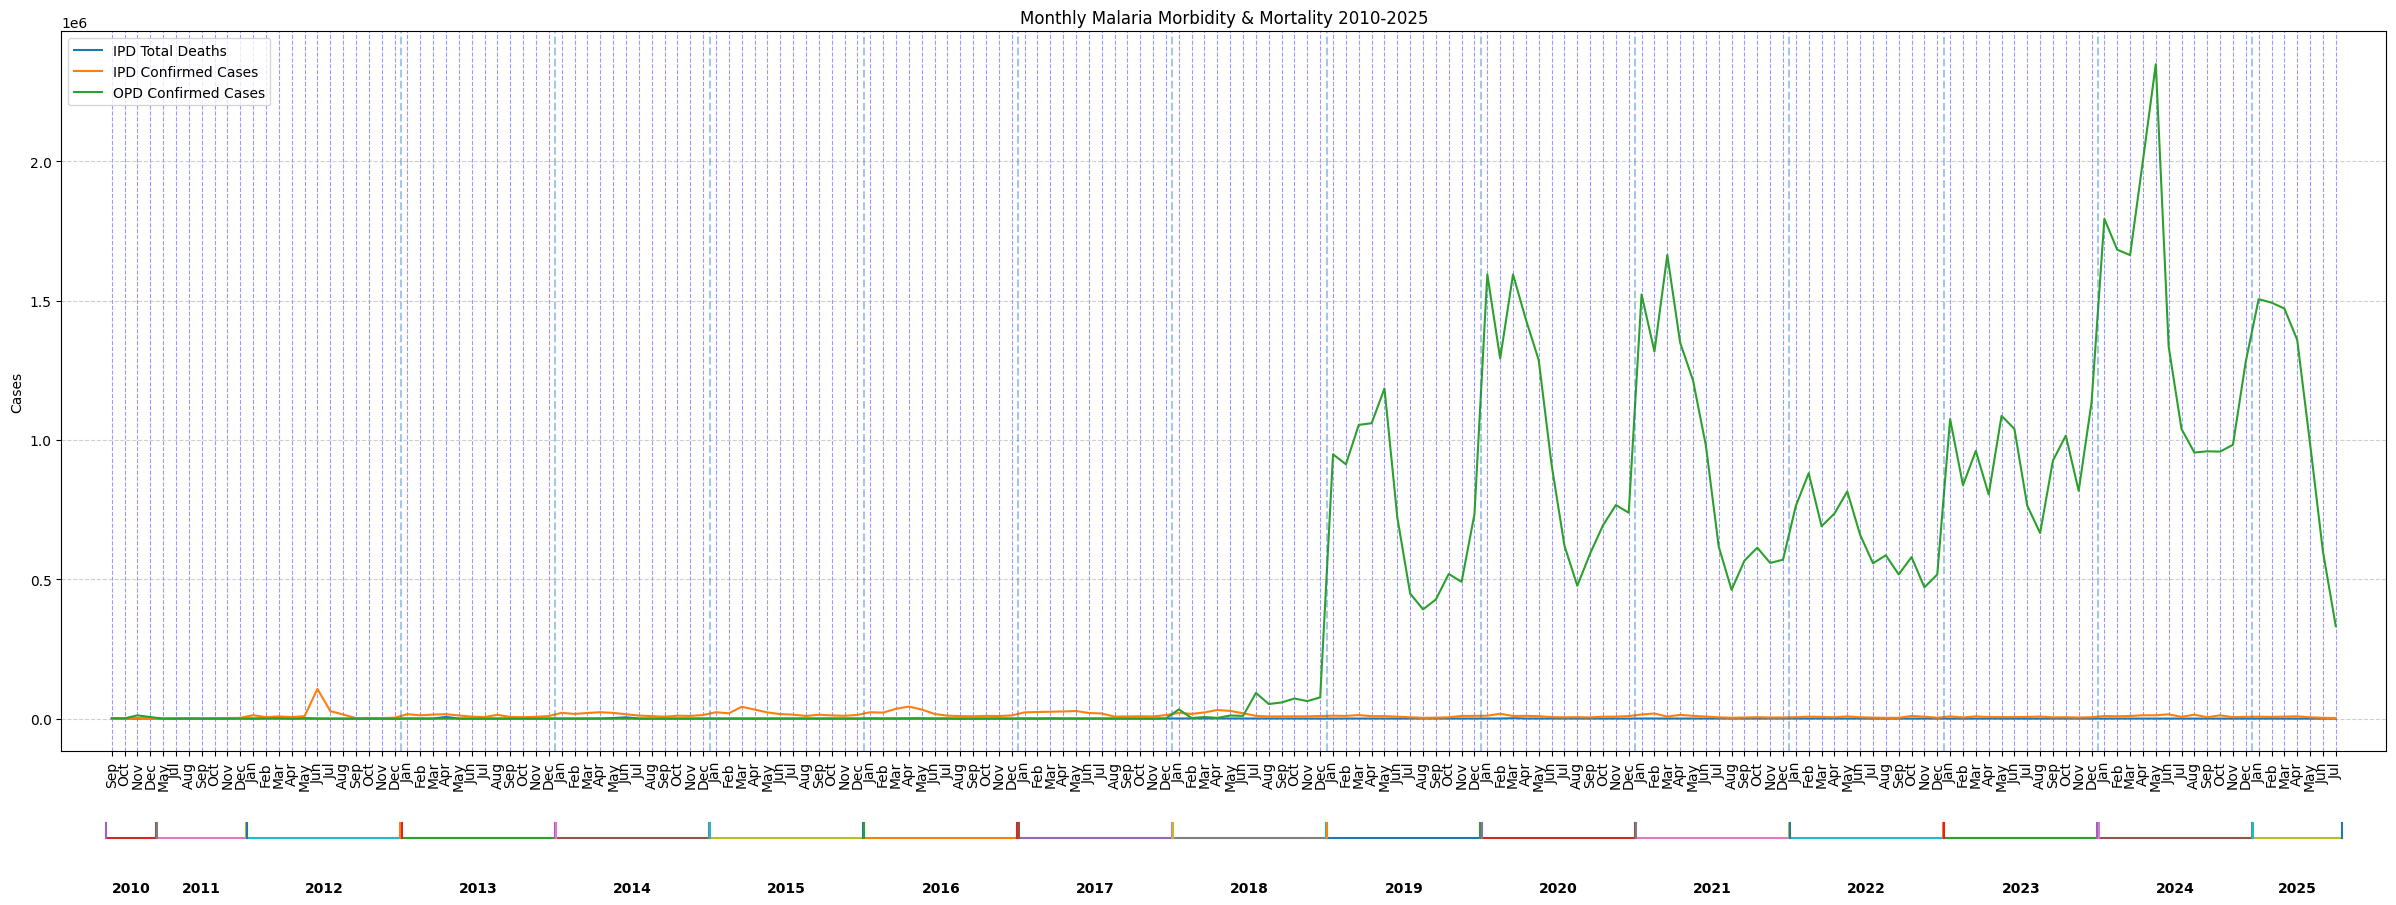

In [41]:

import numpy as np

# Ensure sorted by Year then Month
monthly_cases = monthly_cases.sort_values(["Year", "Month_Num"]).reset_index(drop=True)

x = np.arange(len(monthly_cases))
fig, ax = plt.subplots(figsize=(30, 12))

ax.plot(x, monthly_cases["NMCP IPD Total Malaria Deaths"], label="IPD Total Deaths")
ax.plot(x, monthly_cases["NMCP IPD Confirmed Malaria Cases"], label="IPD Confirmed Cases")
ax.plot(x, monthly_cases["NMCP OPD Confirmed Malaria Cases"], label="OPD Confirmed Cases")

ax.set_title("Monthly Malaria Morbidity & Mortality 2010-2025")
ax.set_ylabel("Cases")
ax.legend()

# Month labels (repeat Jan..Dec under each year)
ax.set_xticks(x)
ax.set_xticklabels(monthly_cases["Month"], rotation=90)

# vertical separators at year boundaries (Jan of each year, except the first) 
jan_idx = monthly_cases.index[monthly_cases["Month_Num"] == 1].tolist()
for i in jan_idx[1:]:
    ax.axvline(i - 0.5, linestyle="--", alpha=0.4)

# Add vertical gridlines for every month
ax.set_axisbelow(True)  # grid behind data
ax.yaxis.grid(True, linestyle="--", alpha=0.6)   # horizontal lines (optional)
ax.xaxis.grid(True, linestyle="--", alpha=0.4, color="blue")  # vertical lines


# Year labels centered under each year's 12 months 
# Use axes coords for y so it's always just below the axis
for y, grp in monthly_cases.groupby("Year", sort=False):
    i0 = grp.index.min()
    i1 = grp.index.max()
    xpos = (i0 + i1) / 2.0  # center of the span in data coords
    ax.text(
        xpos, -0.18, str(y),
        ha="center", va="top", fontweight="bold",
        transform=ax.get_xaxis_transform()
    )

    #  little bracket under each year's span (purely cosmetic)
    ax.plot([i0 - 0.45, i1 + 0.45], [-0.12, -0.12],
            transform=ax.get_xaxis_transform(), clip_on=False)
    ax.plot([i0 - 0.45, i0 - 0.45], [-0.12, -0.10],
            transform=ax.get_xaxis_transform(), clip_on=False)
    ax.plot([i1 + 0.45, i1 + 0.45], [-0.12, -0.10],
            transform=ax.get_xaxis_transform(), clip_on=False)
    ax.margins(x=0.02)  # 2% spacing on left and right


# Give extra bottom margin so year labels aren't clipped
fig.subplots_adjust(bottom=0.28)
plt.savefig("malaria_trends_monthly.png", dpi=300, bbox_inches="tight")
plt.show()



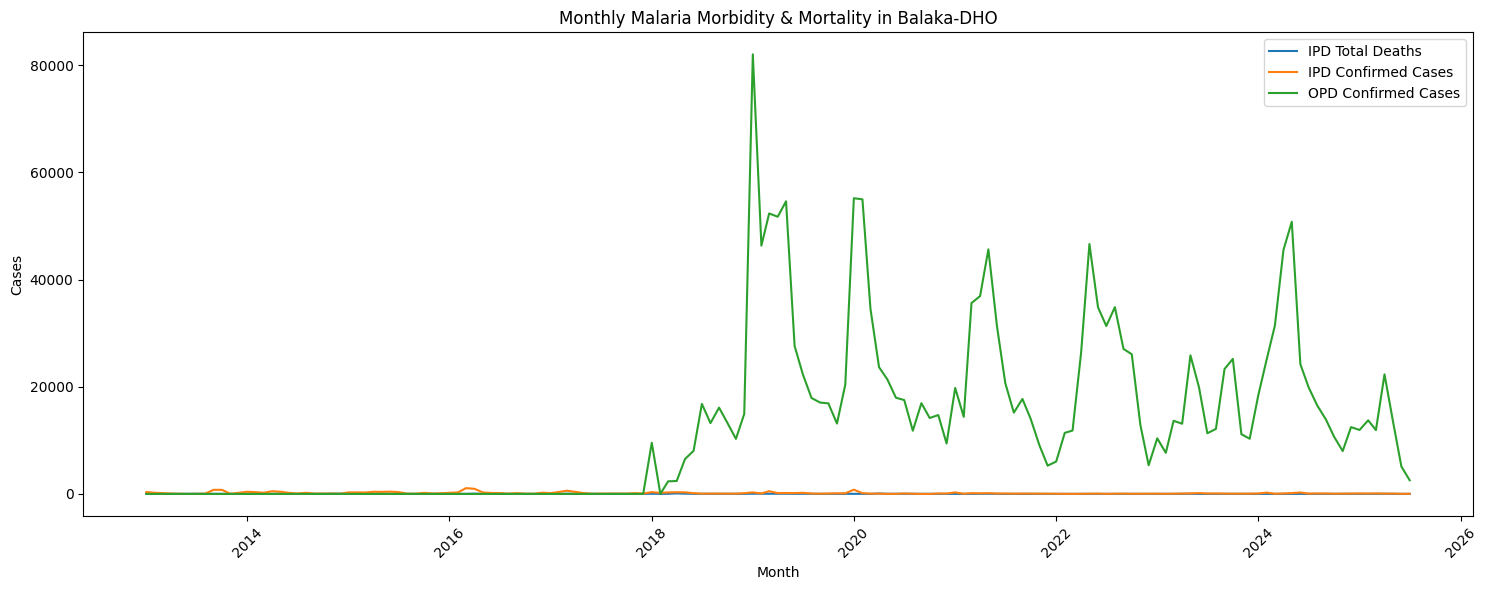

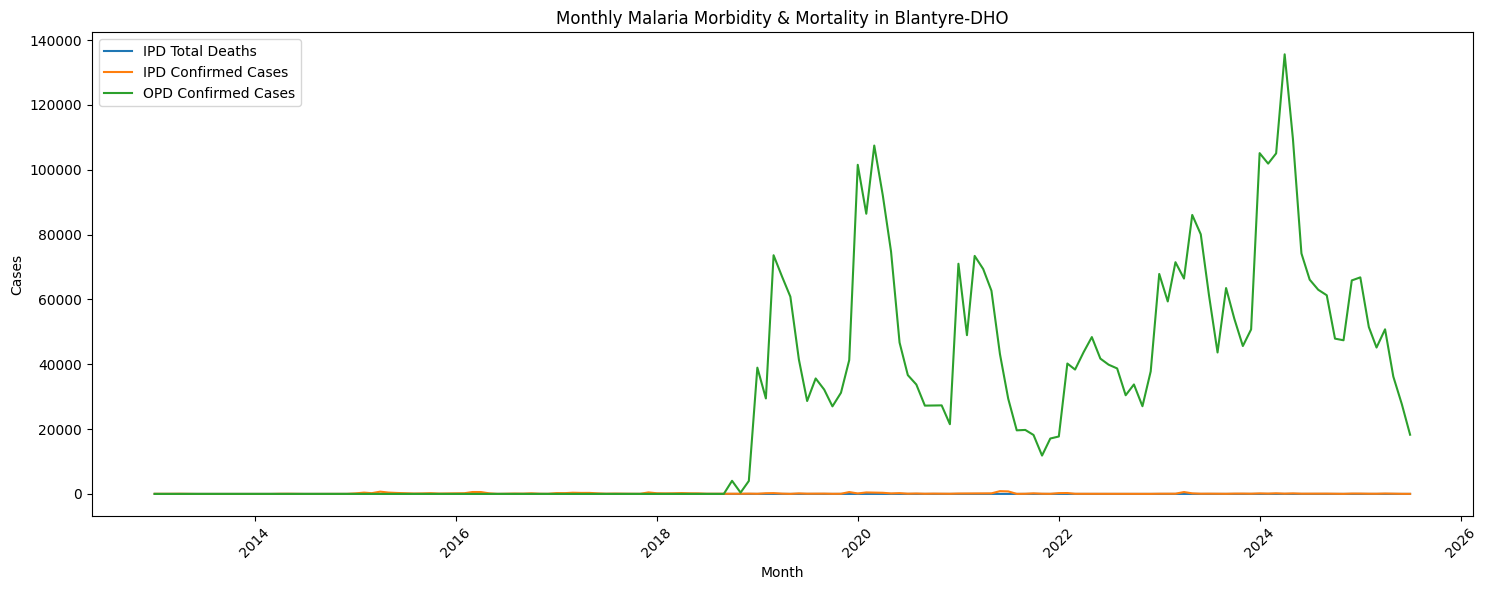

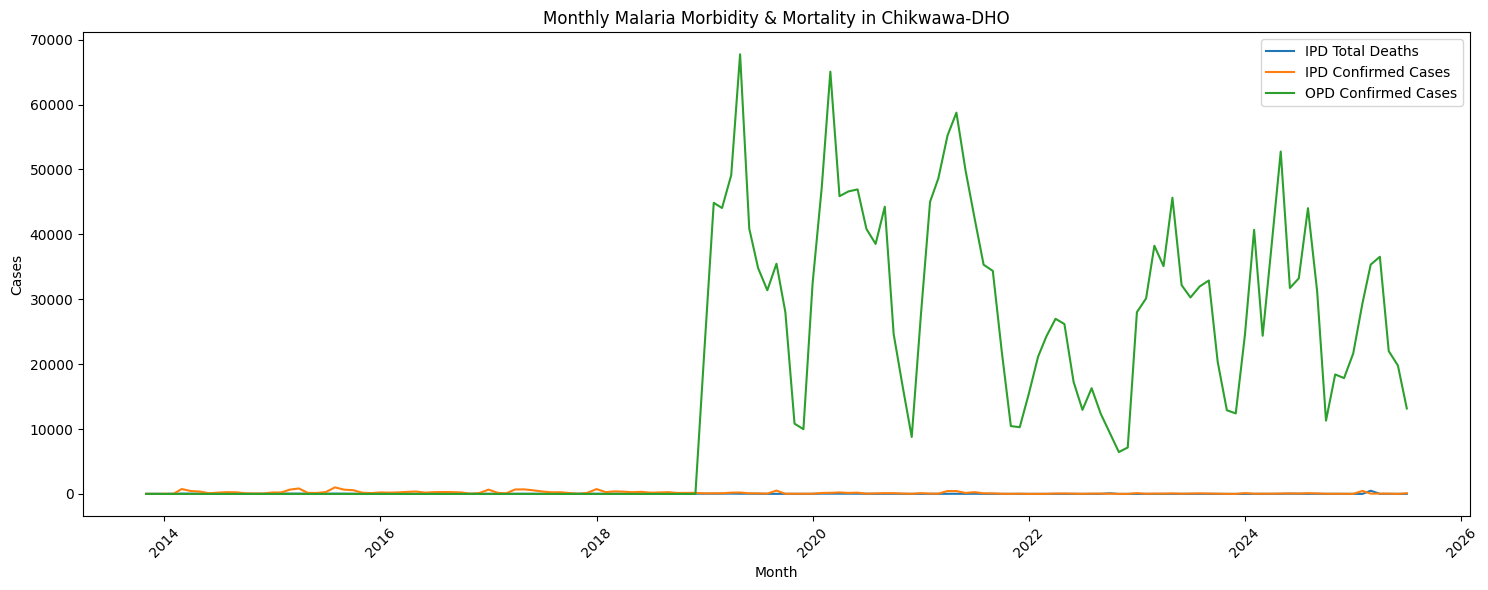

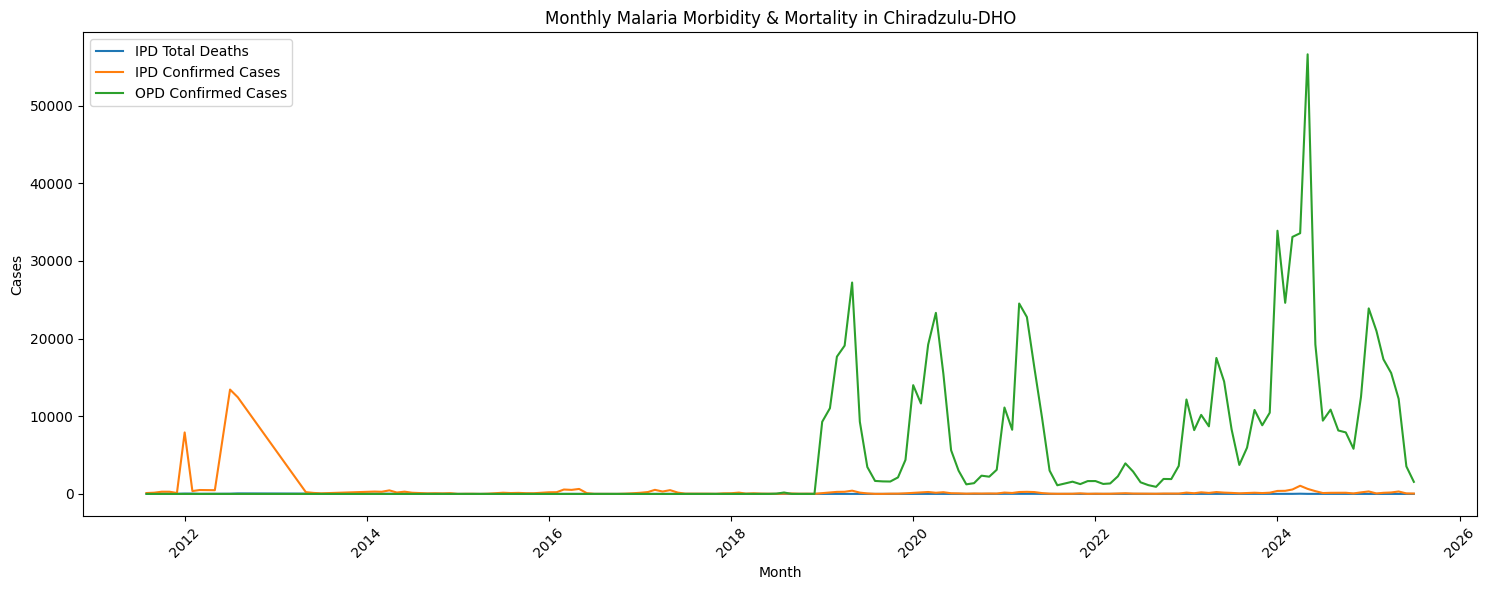

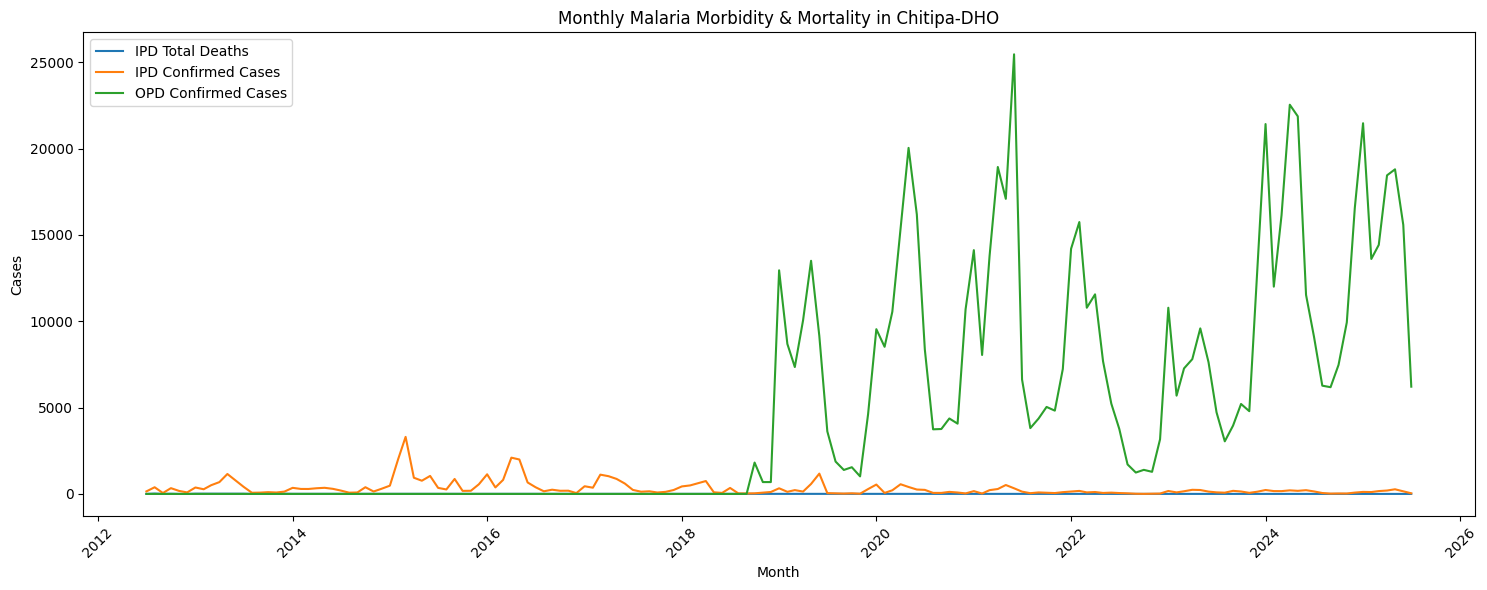

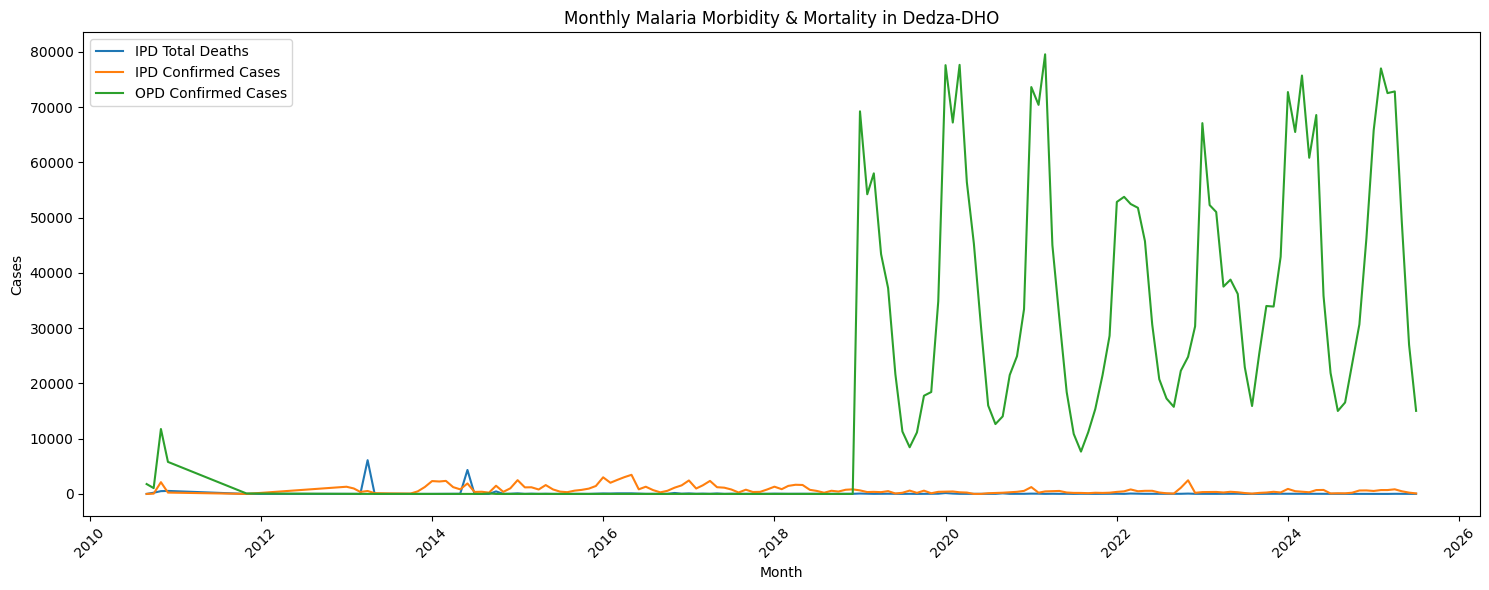

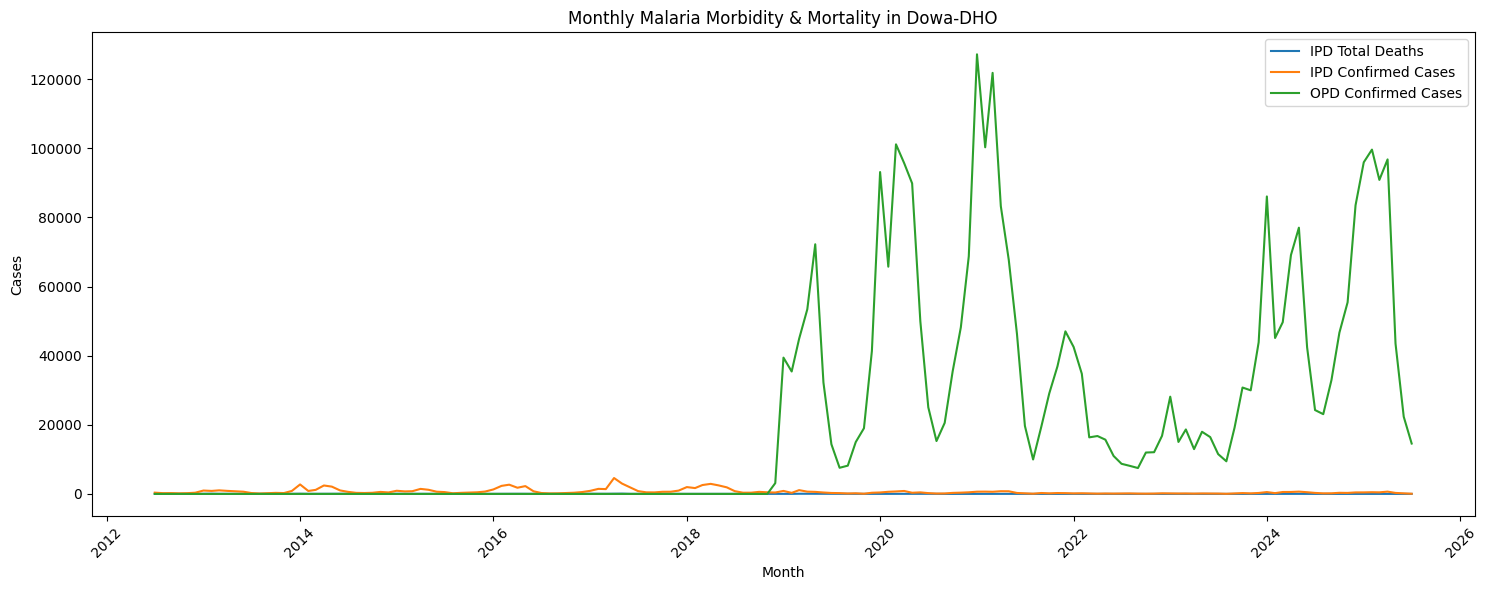

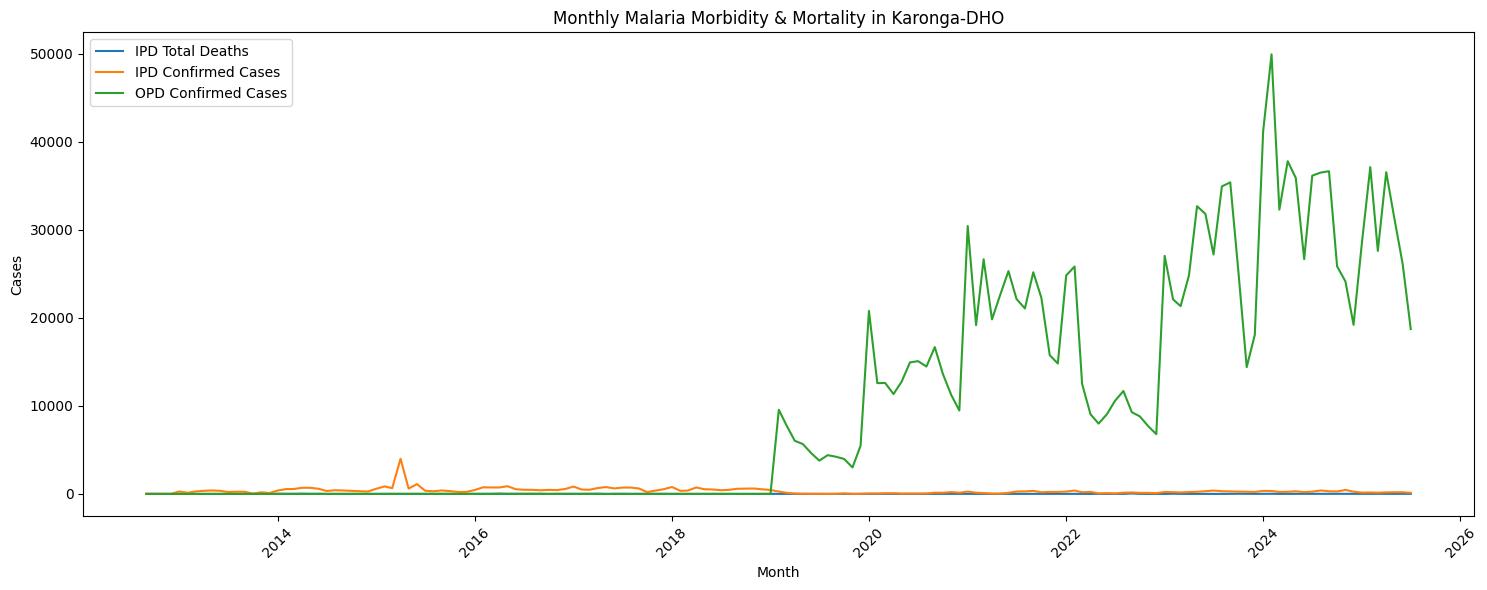

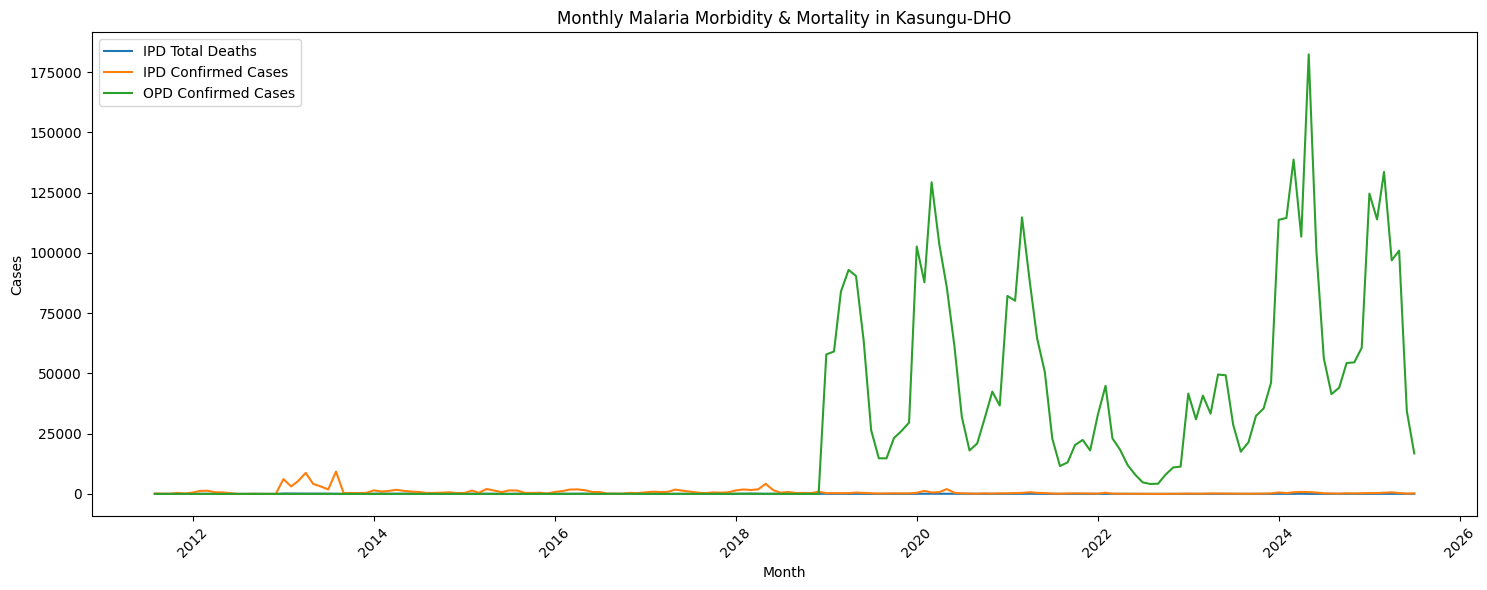

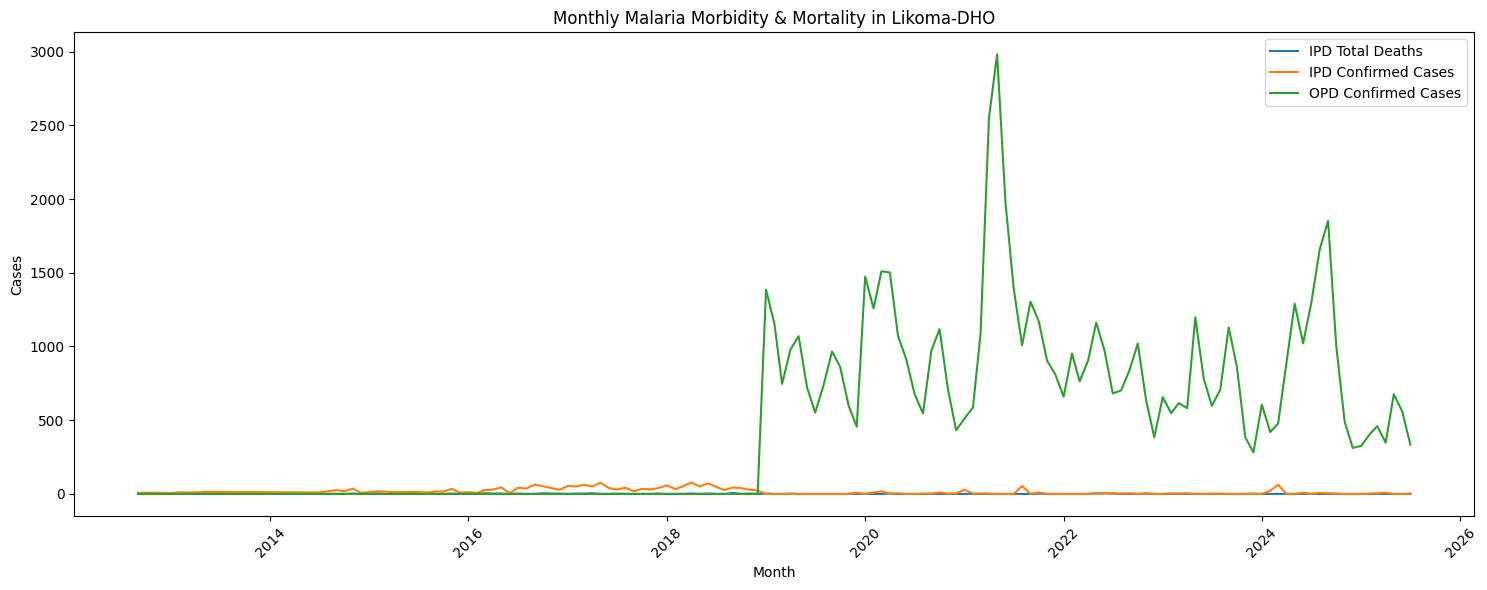

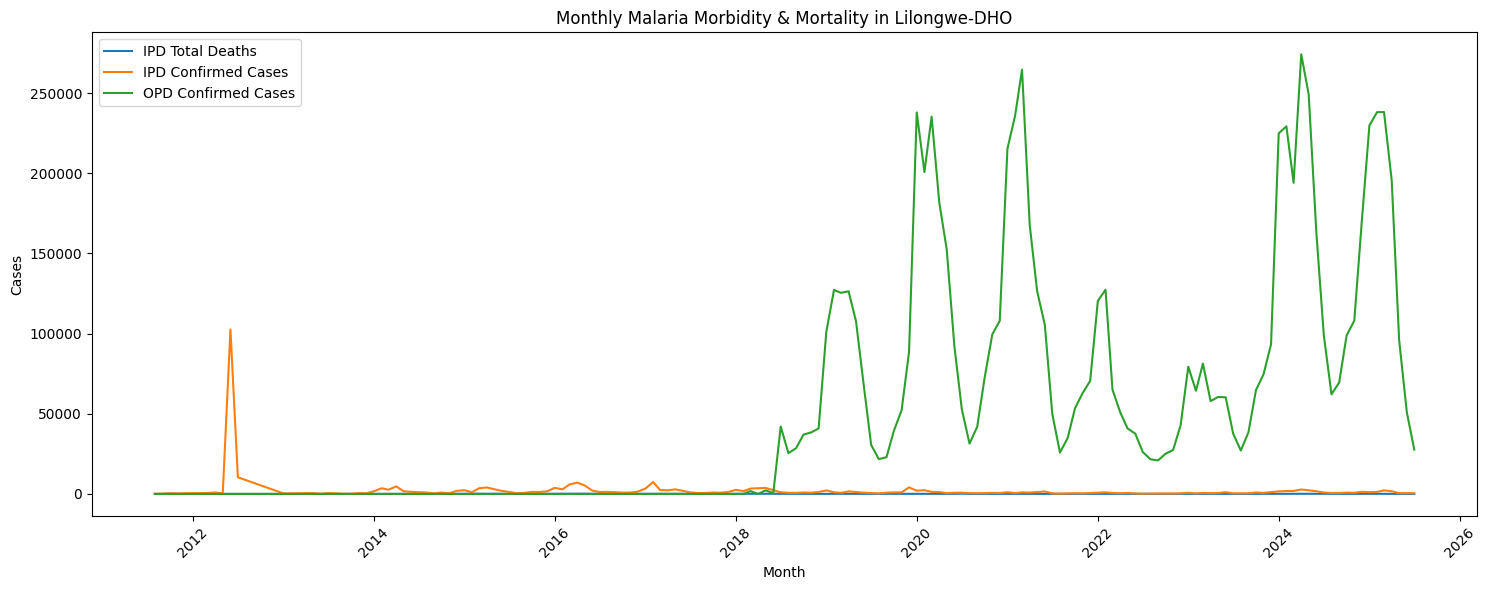

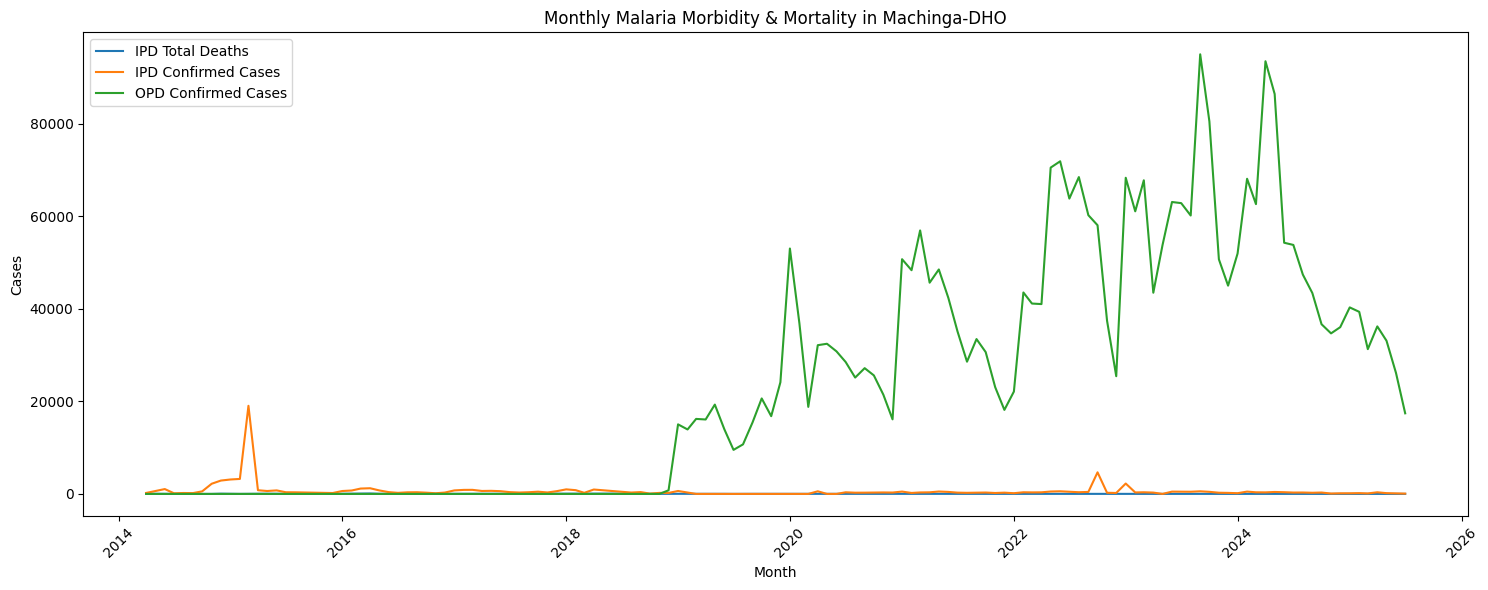

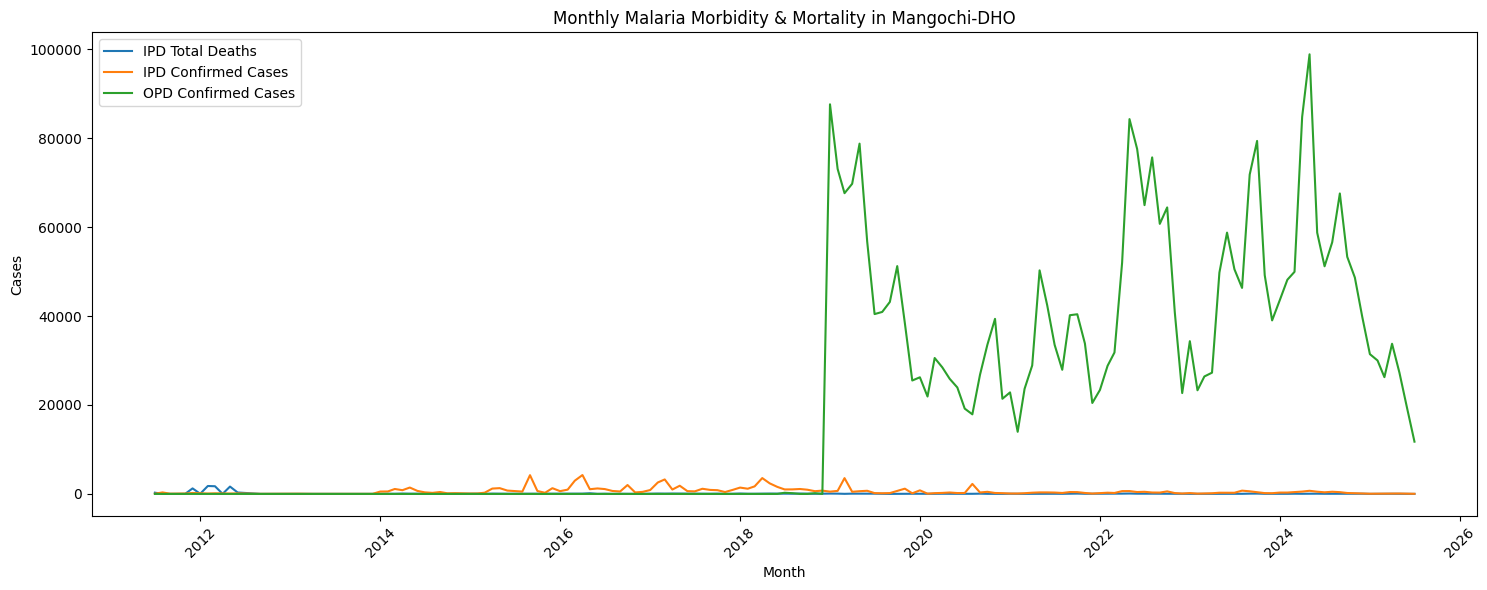

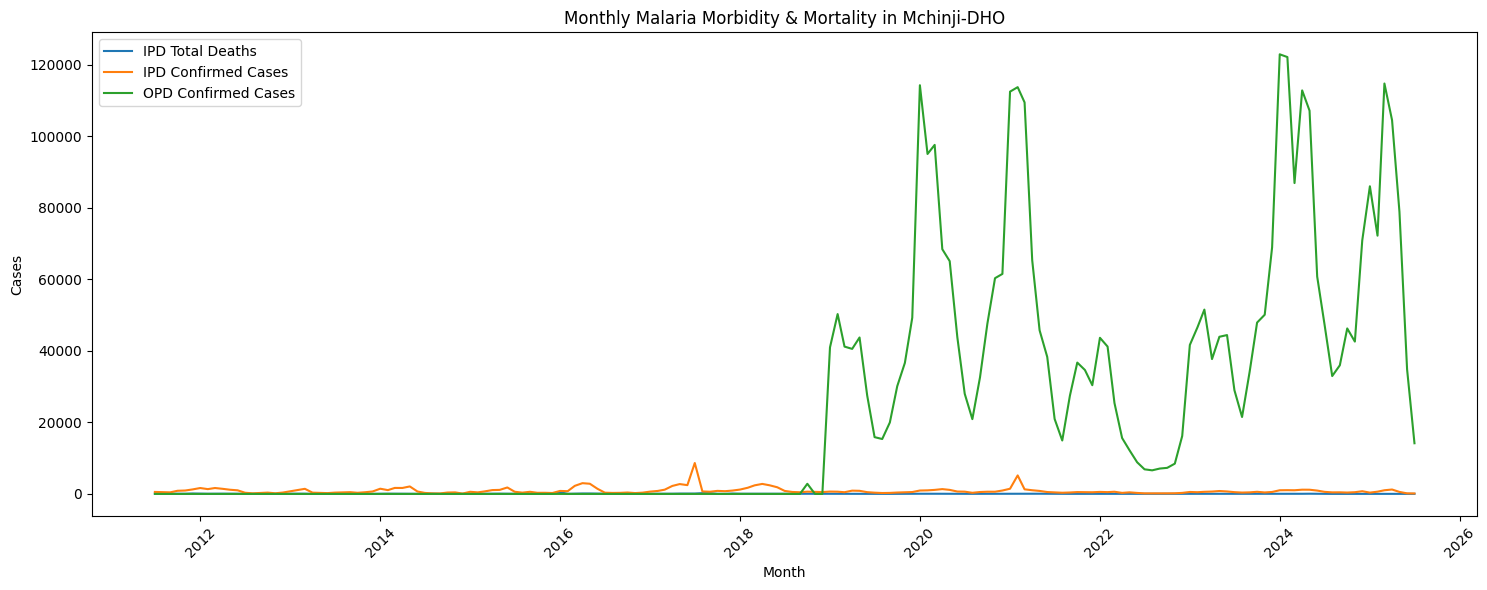

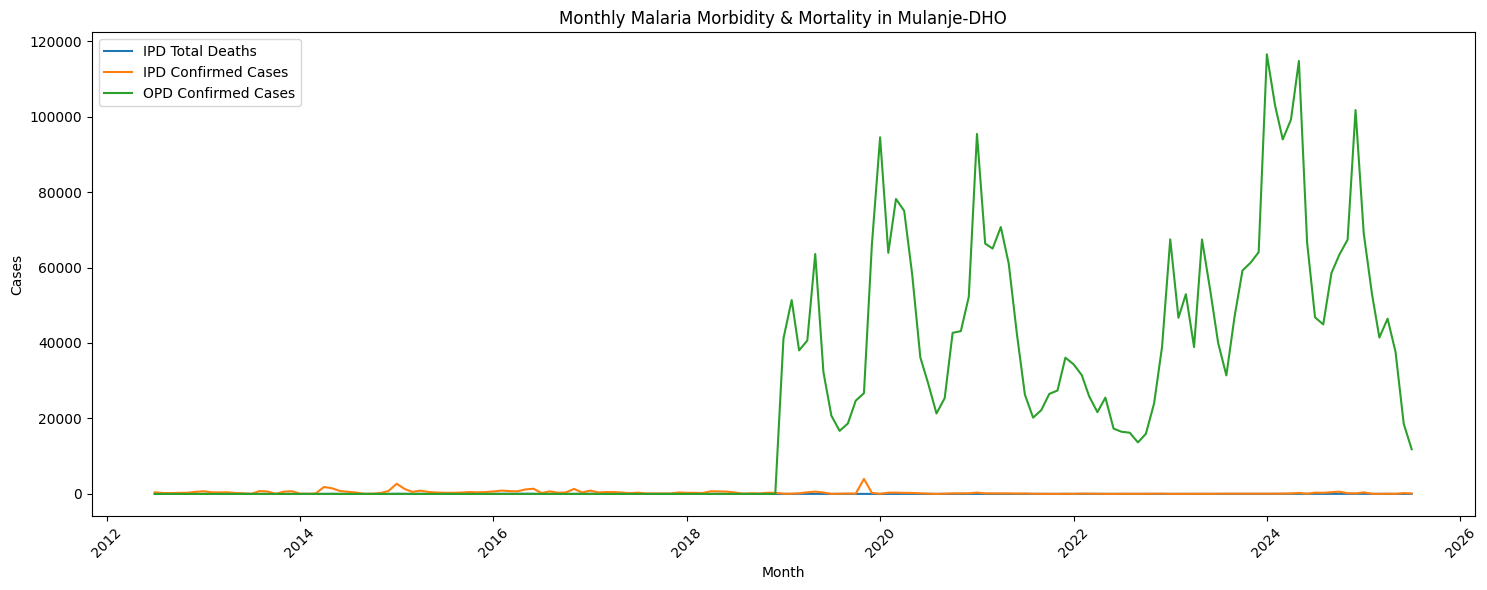

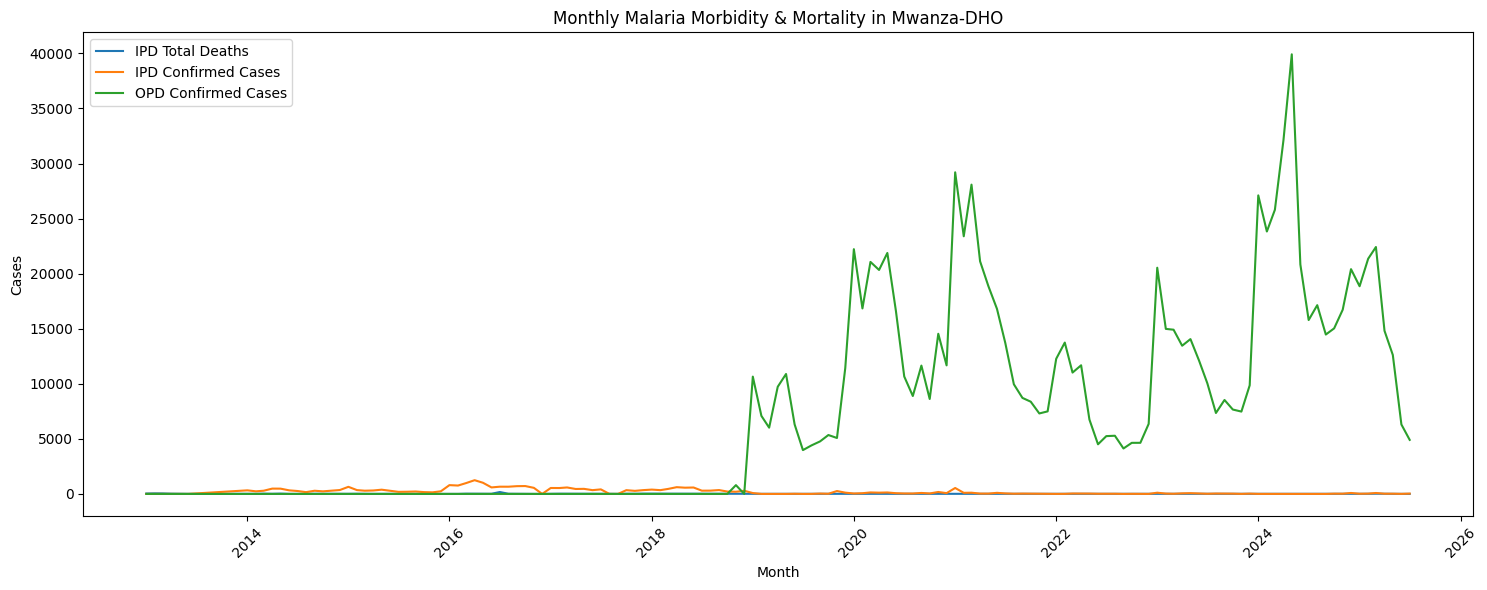

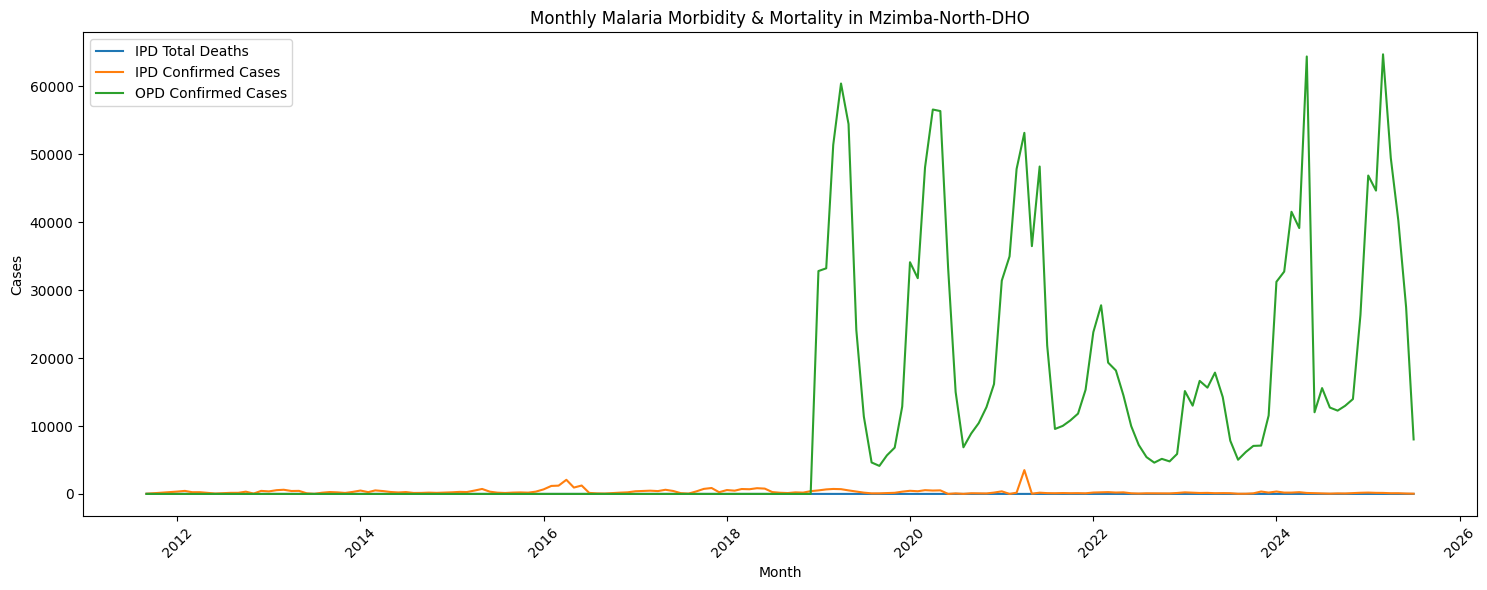

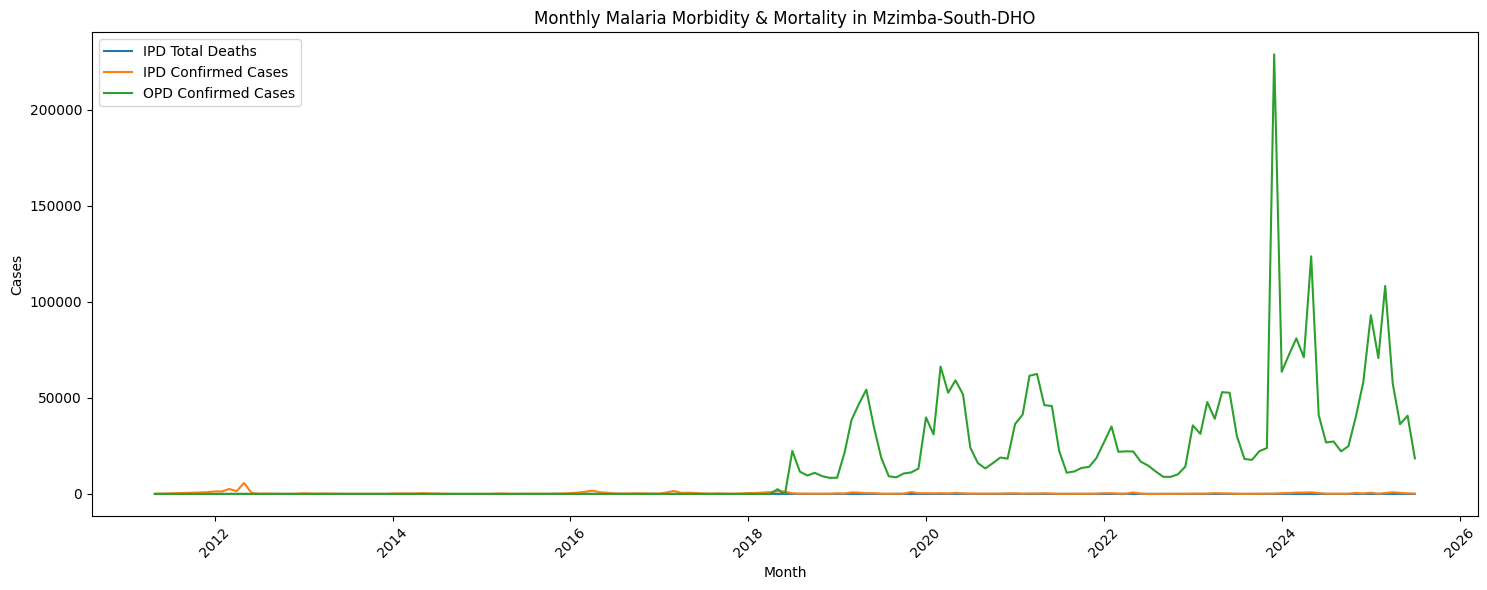

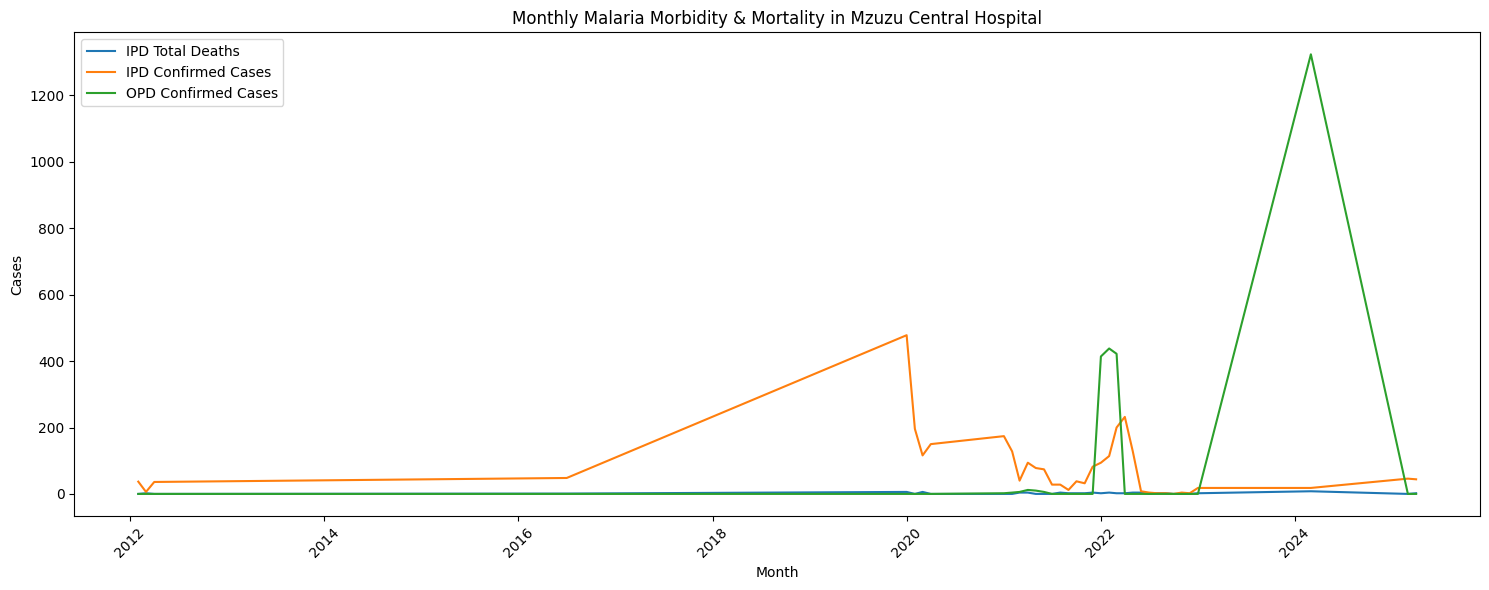

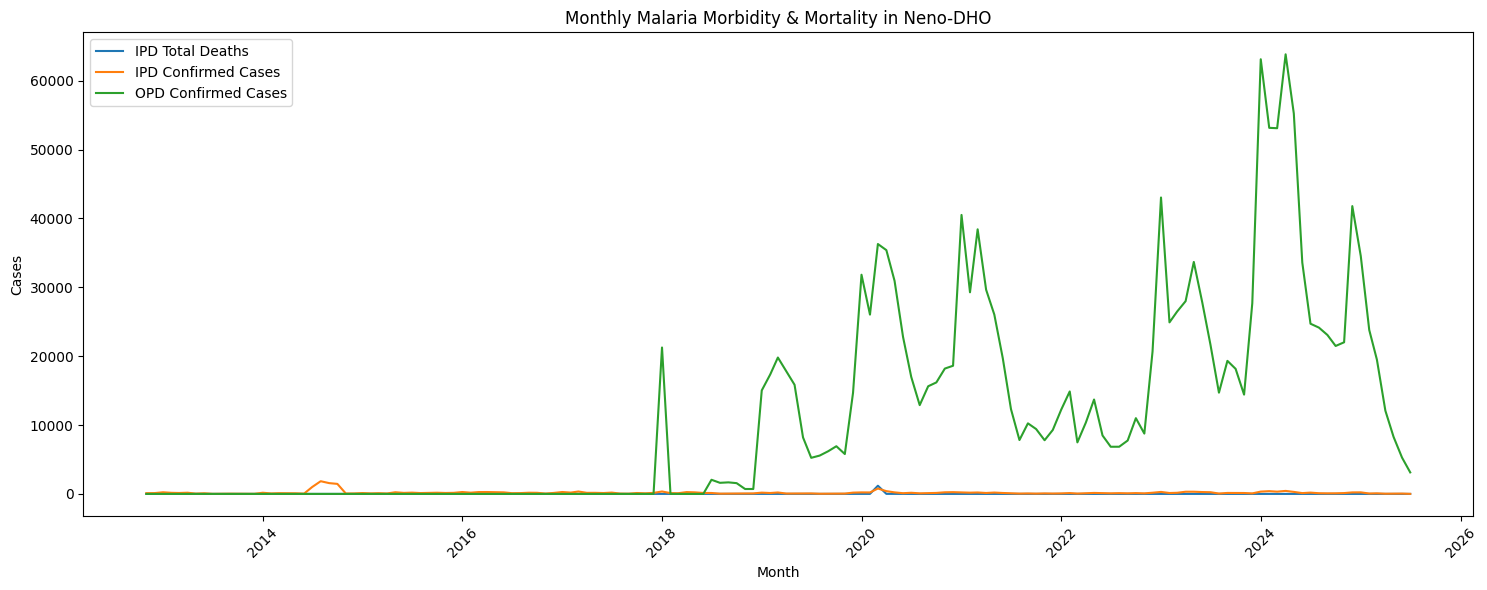

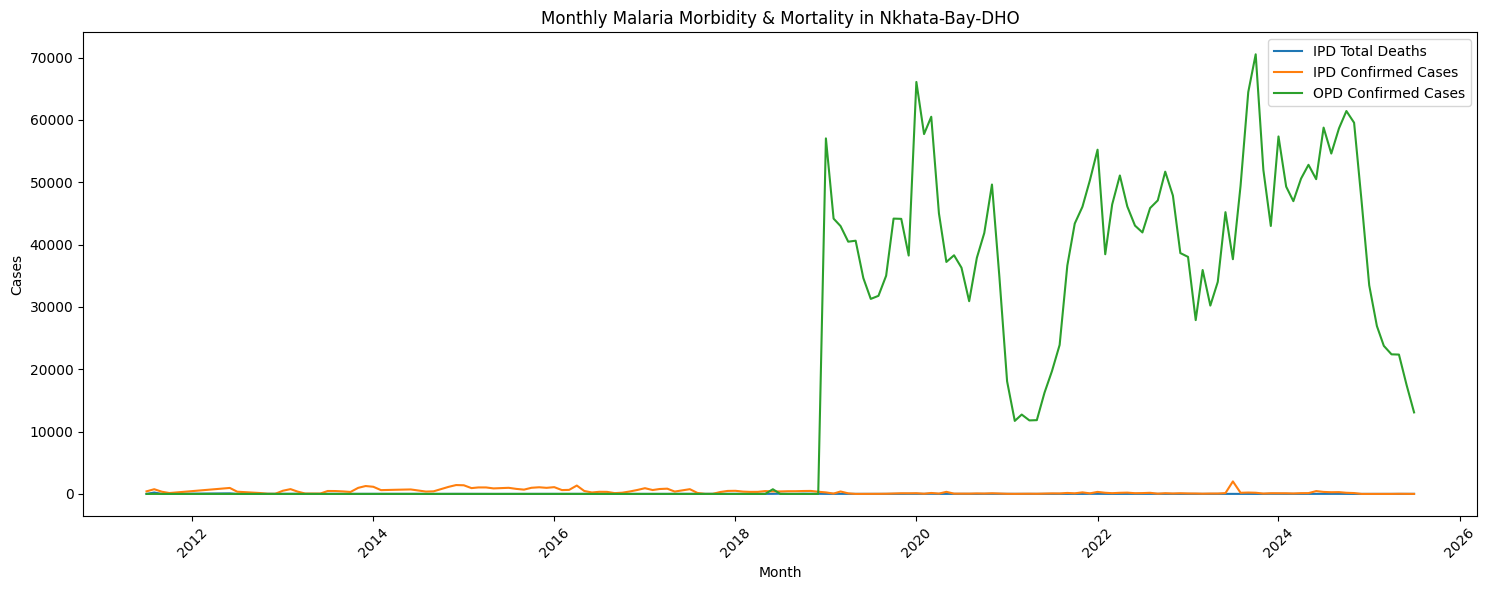

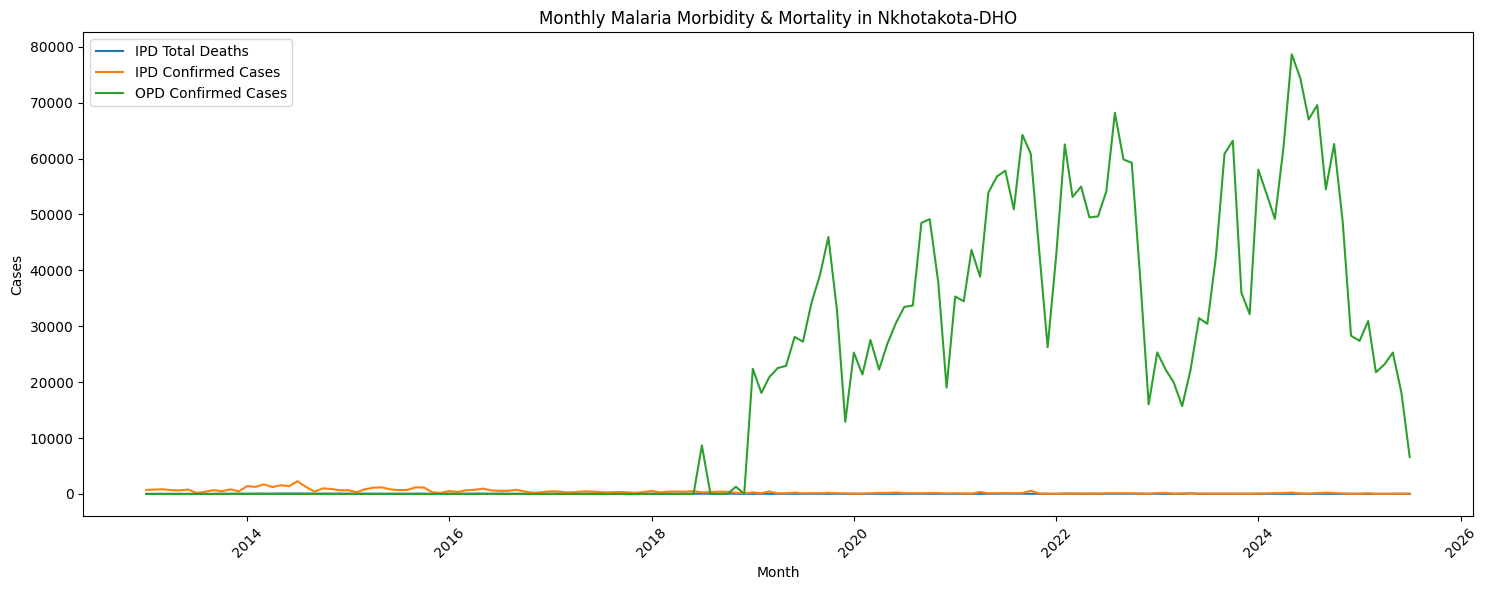

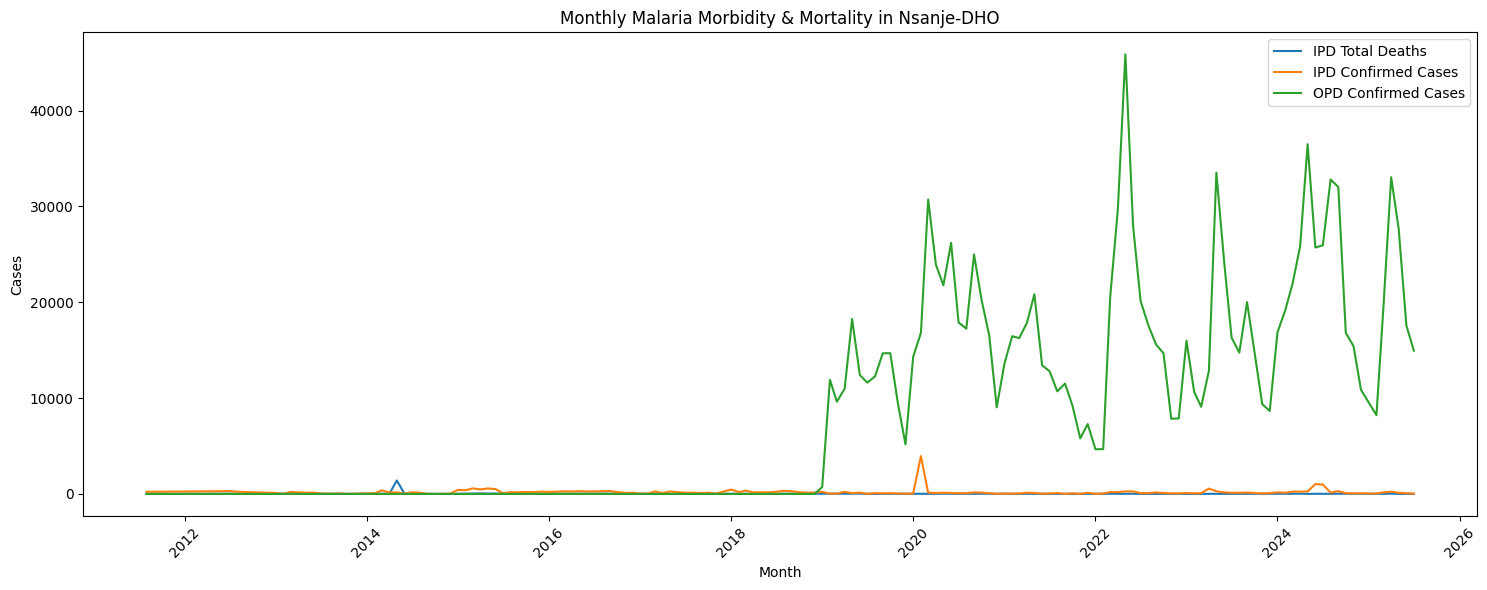

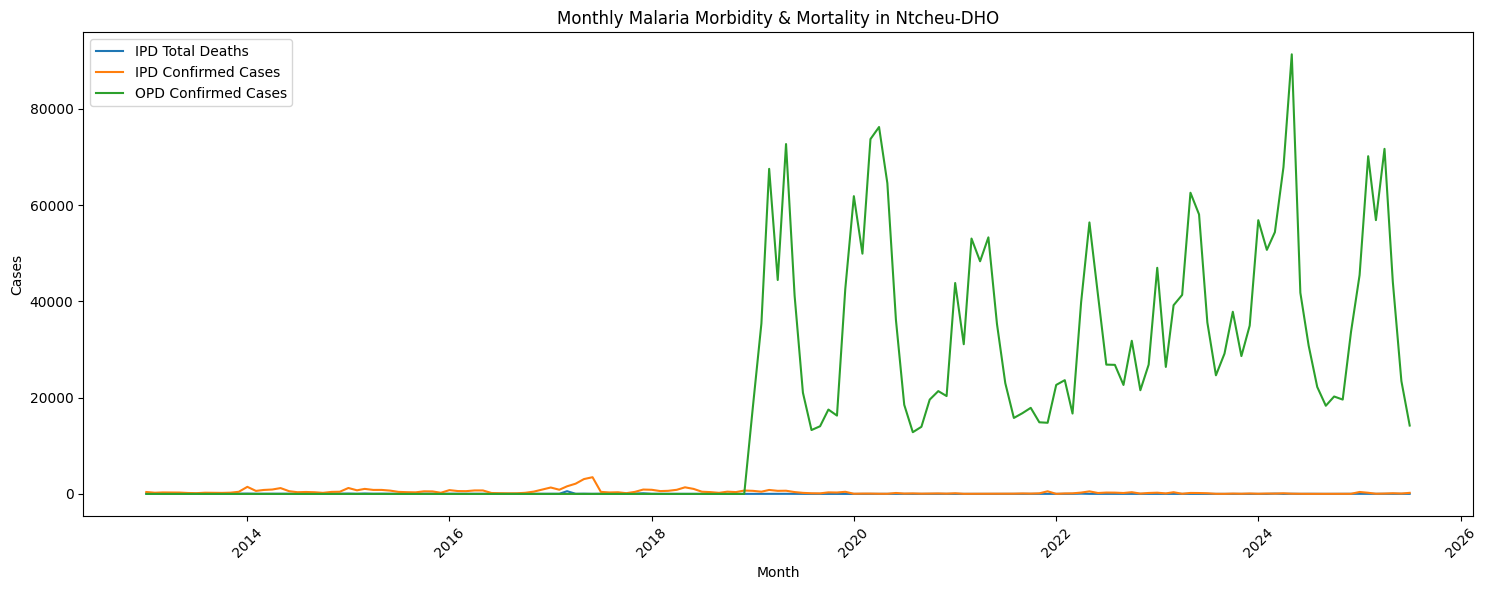

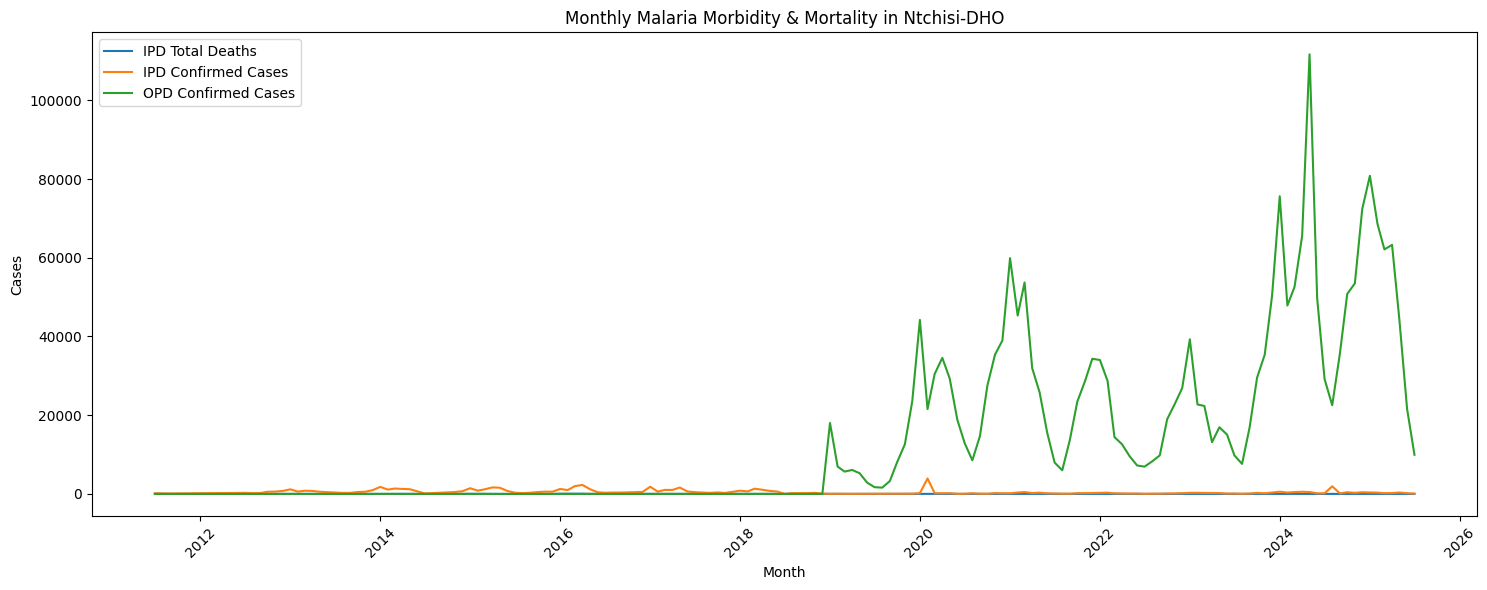

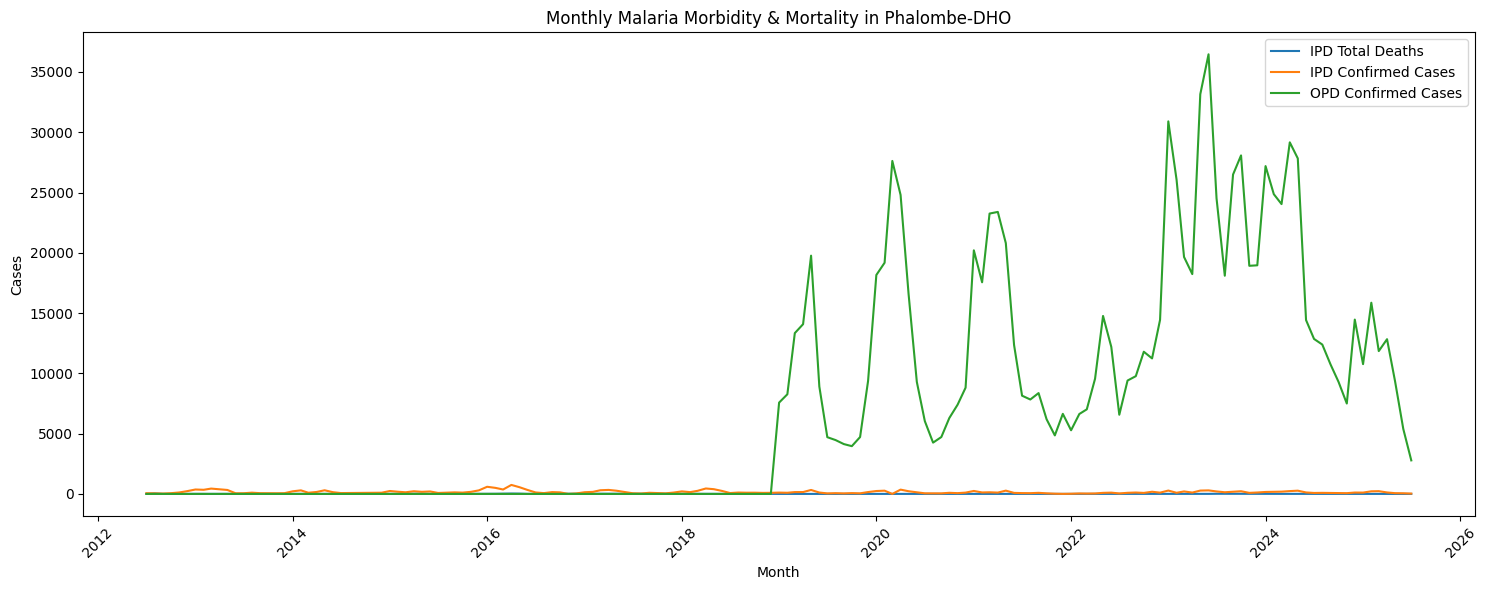

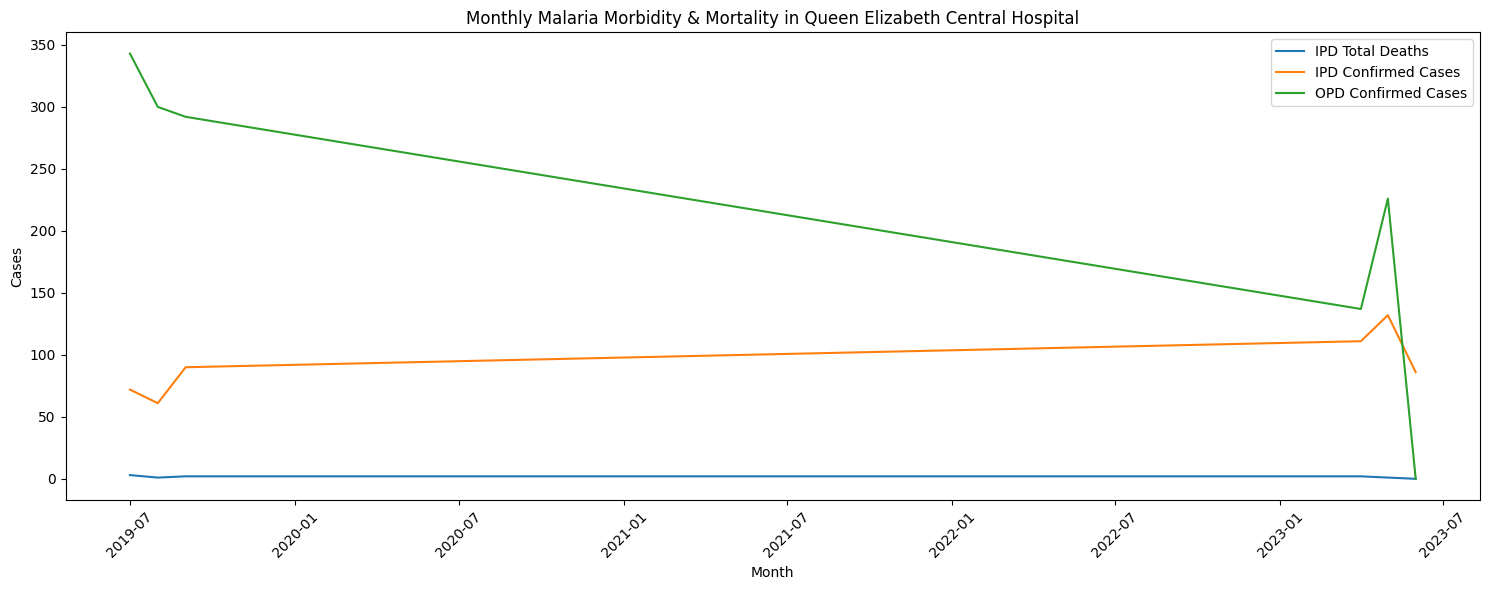

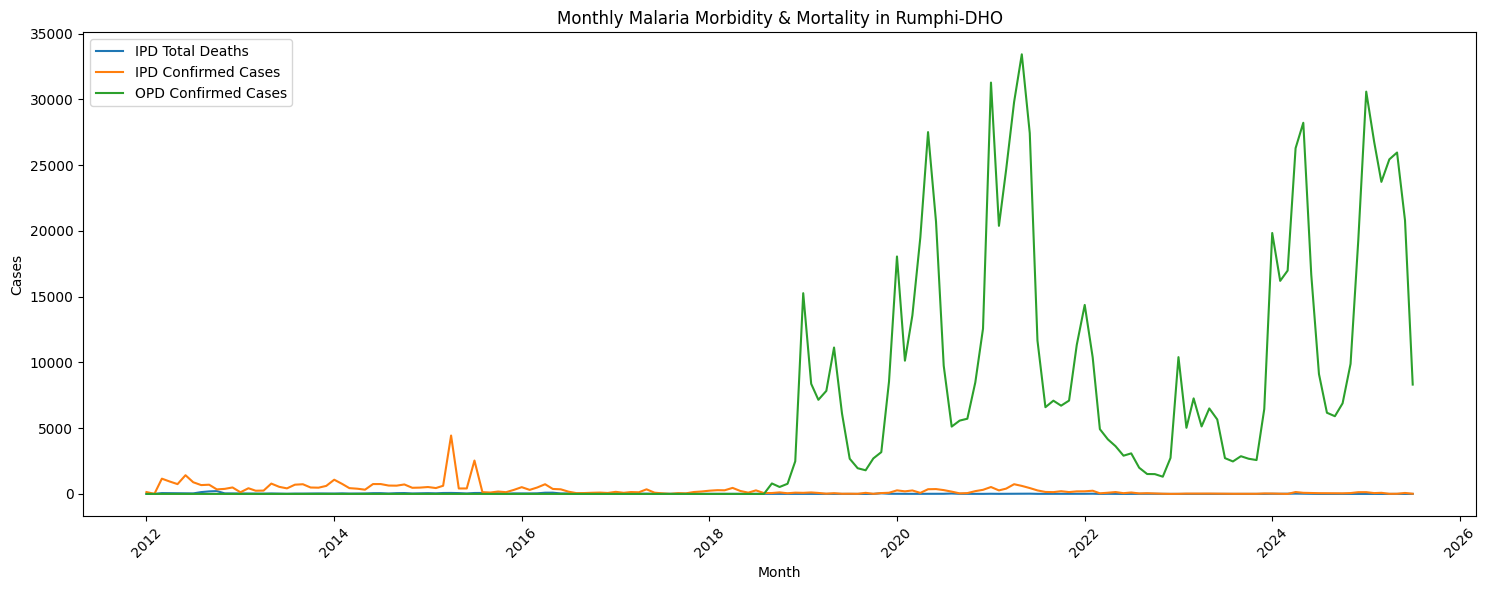

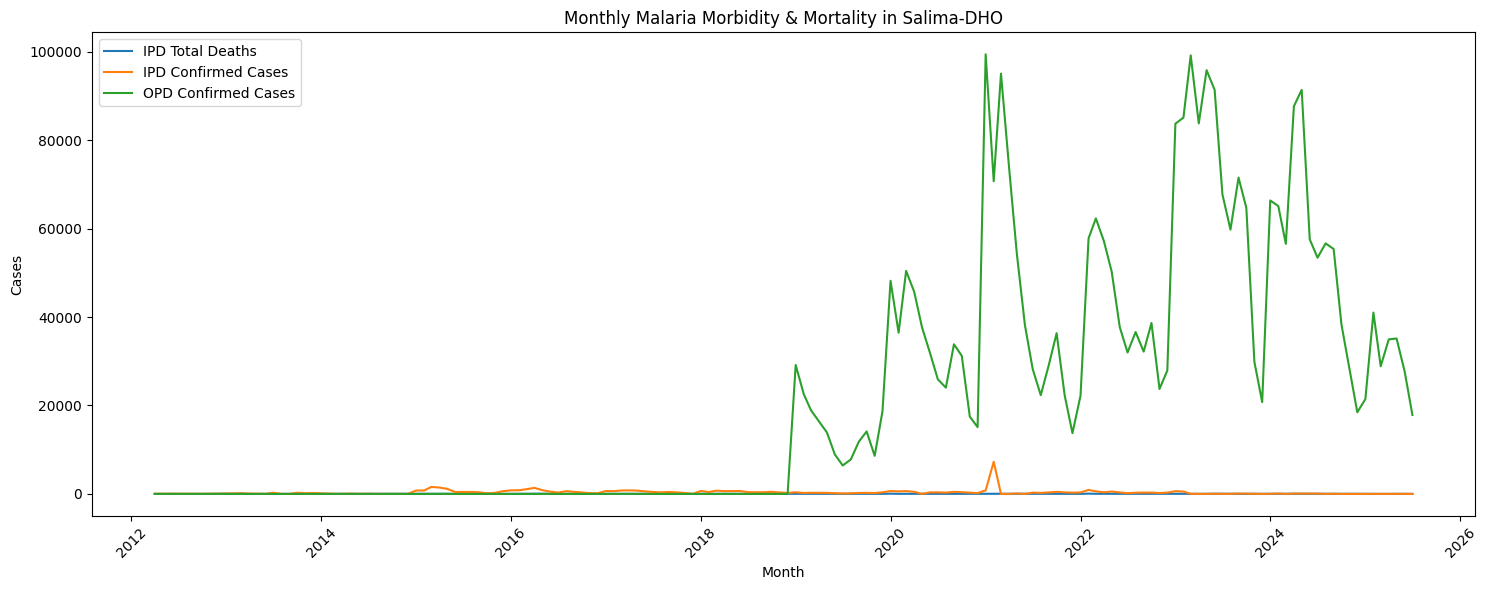

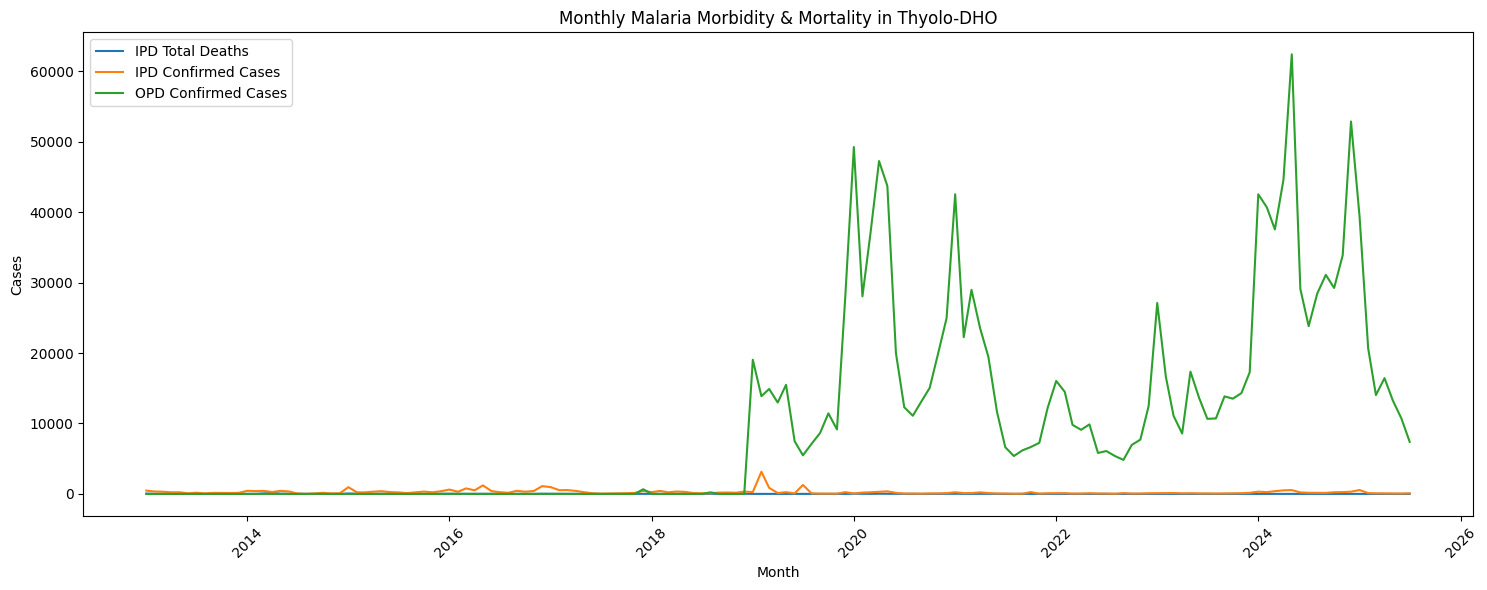

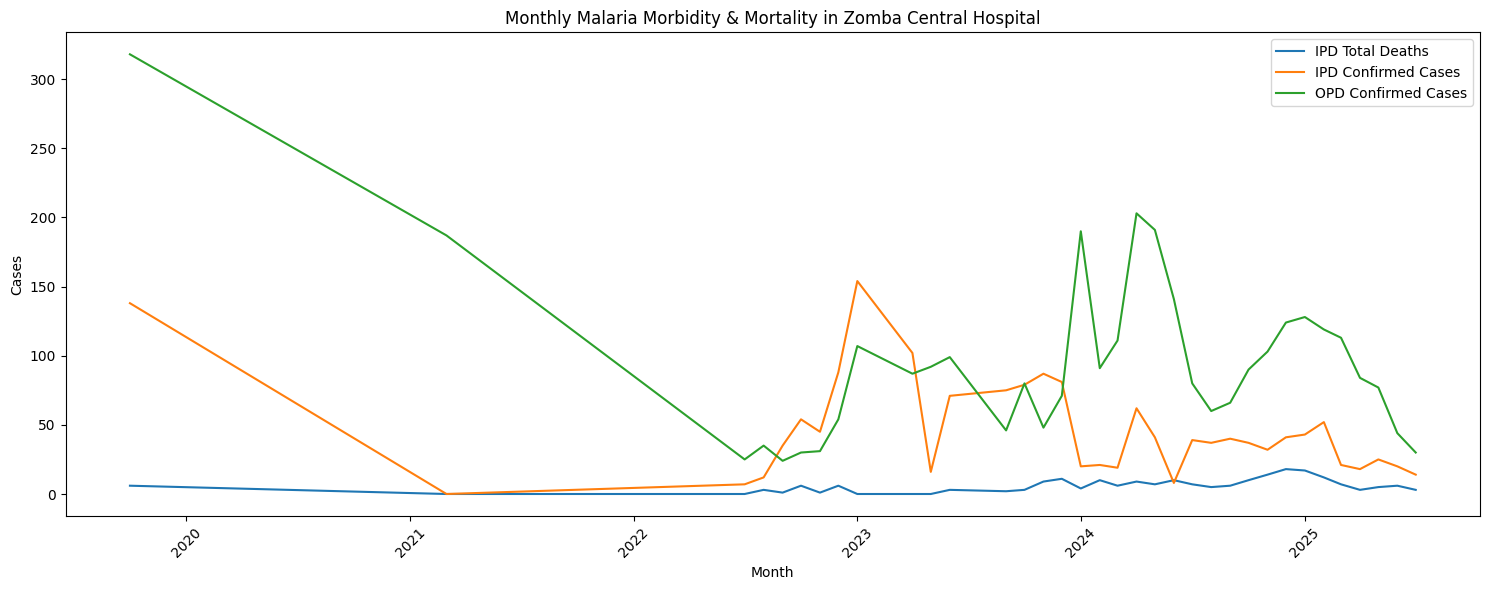

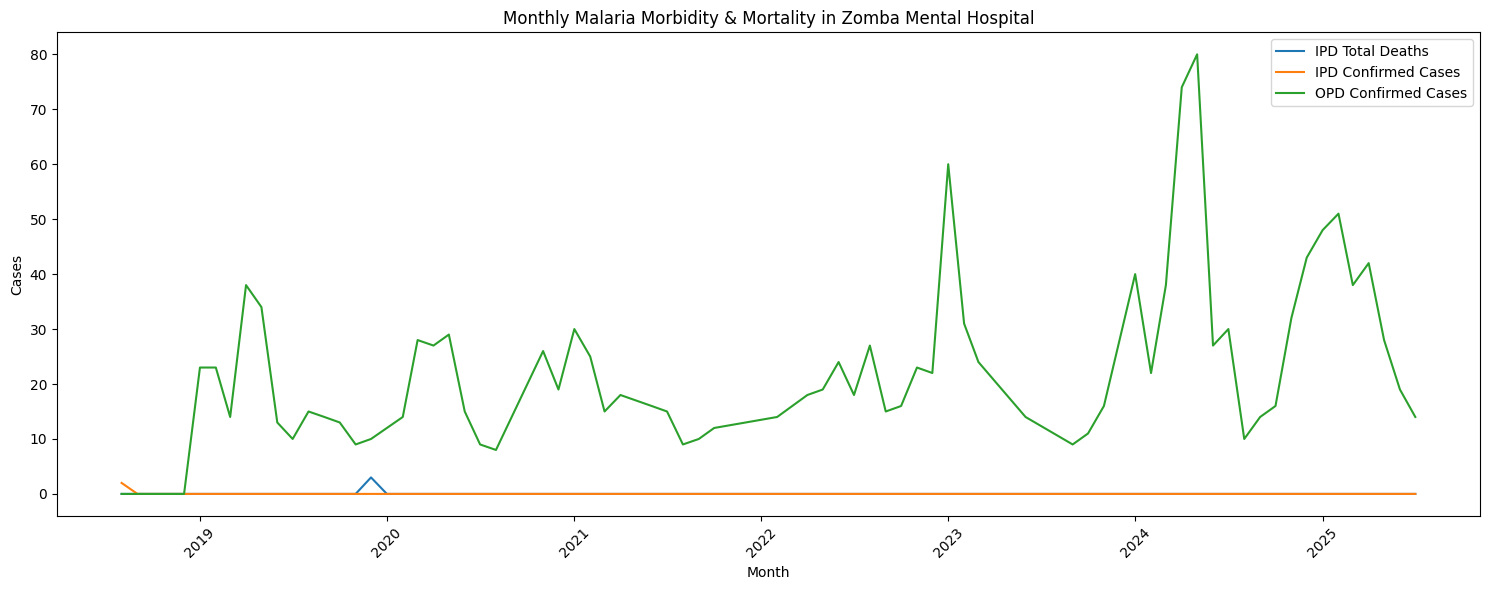

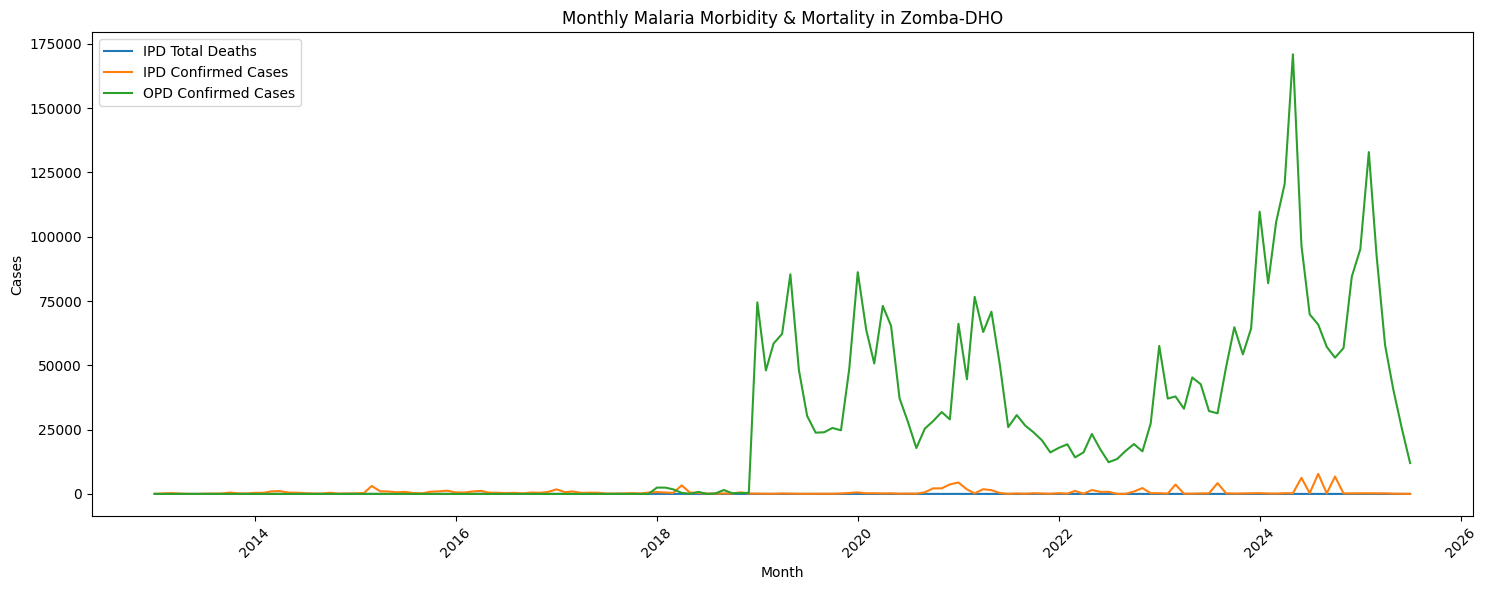

In [31]:

# Example: assume you have a 'District' column in monthly_cases
monthly_cases = (
    df_merged_incidence.groupby(['orgunitlevel3', 'Year', 'Month_Num', 'Month'], as_index=False).agg({
        'date_col': 'first',  # take first date in the group
        'NMCP IPD Total Malaria Deaths': 'sum',
        'NMCP IPD Confirmed Malaria Cases': 'sum',
        'NMCP OPD Confirmed Malaria Cases': 'sum'
    }).sort_values(['orgunitlevel3', 'Year', 'Month_Num'])
)


for loc, subset in monthly_cases.groupby("orgunitlevel3"):
    plt.figure(figsize=(15,6))
    plt.plot(subset["date_col"], subset["NMCP IPD Total Malaria Deaths"], label="IPD Total Deaths")
    plt.plot(subset["date_col"], subset["NMCP IPD Confirmed Malaria Cases"], label="IPD Confirmed Cases")
    plt.plot(subset["date_col"], subset["NMCP OPD Confirmed Malaria Cases"], label="OPD Confirmed Cases")

    plt.title(f"Monthly Malaria Morbidity & Mortality in {loc}")
    plt.xlabel("Month")
    plt.ylabel("Cases")
    plt.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    # Save each location’s plot
    # plt.savefig(f"plots/malaria_trends_{loc}.png", dpi=300, bbox_inches="tight")
    # plt.close()


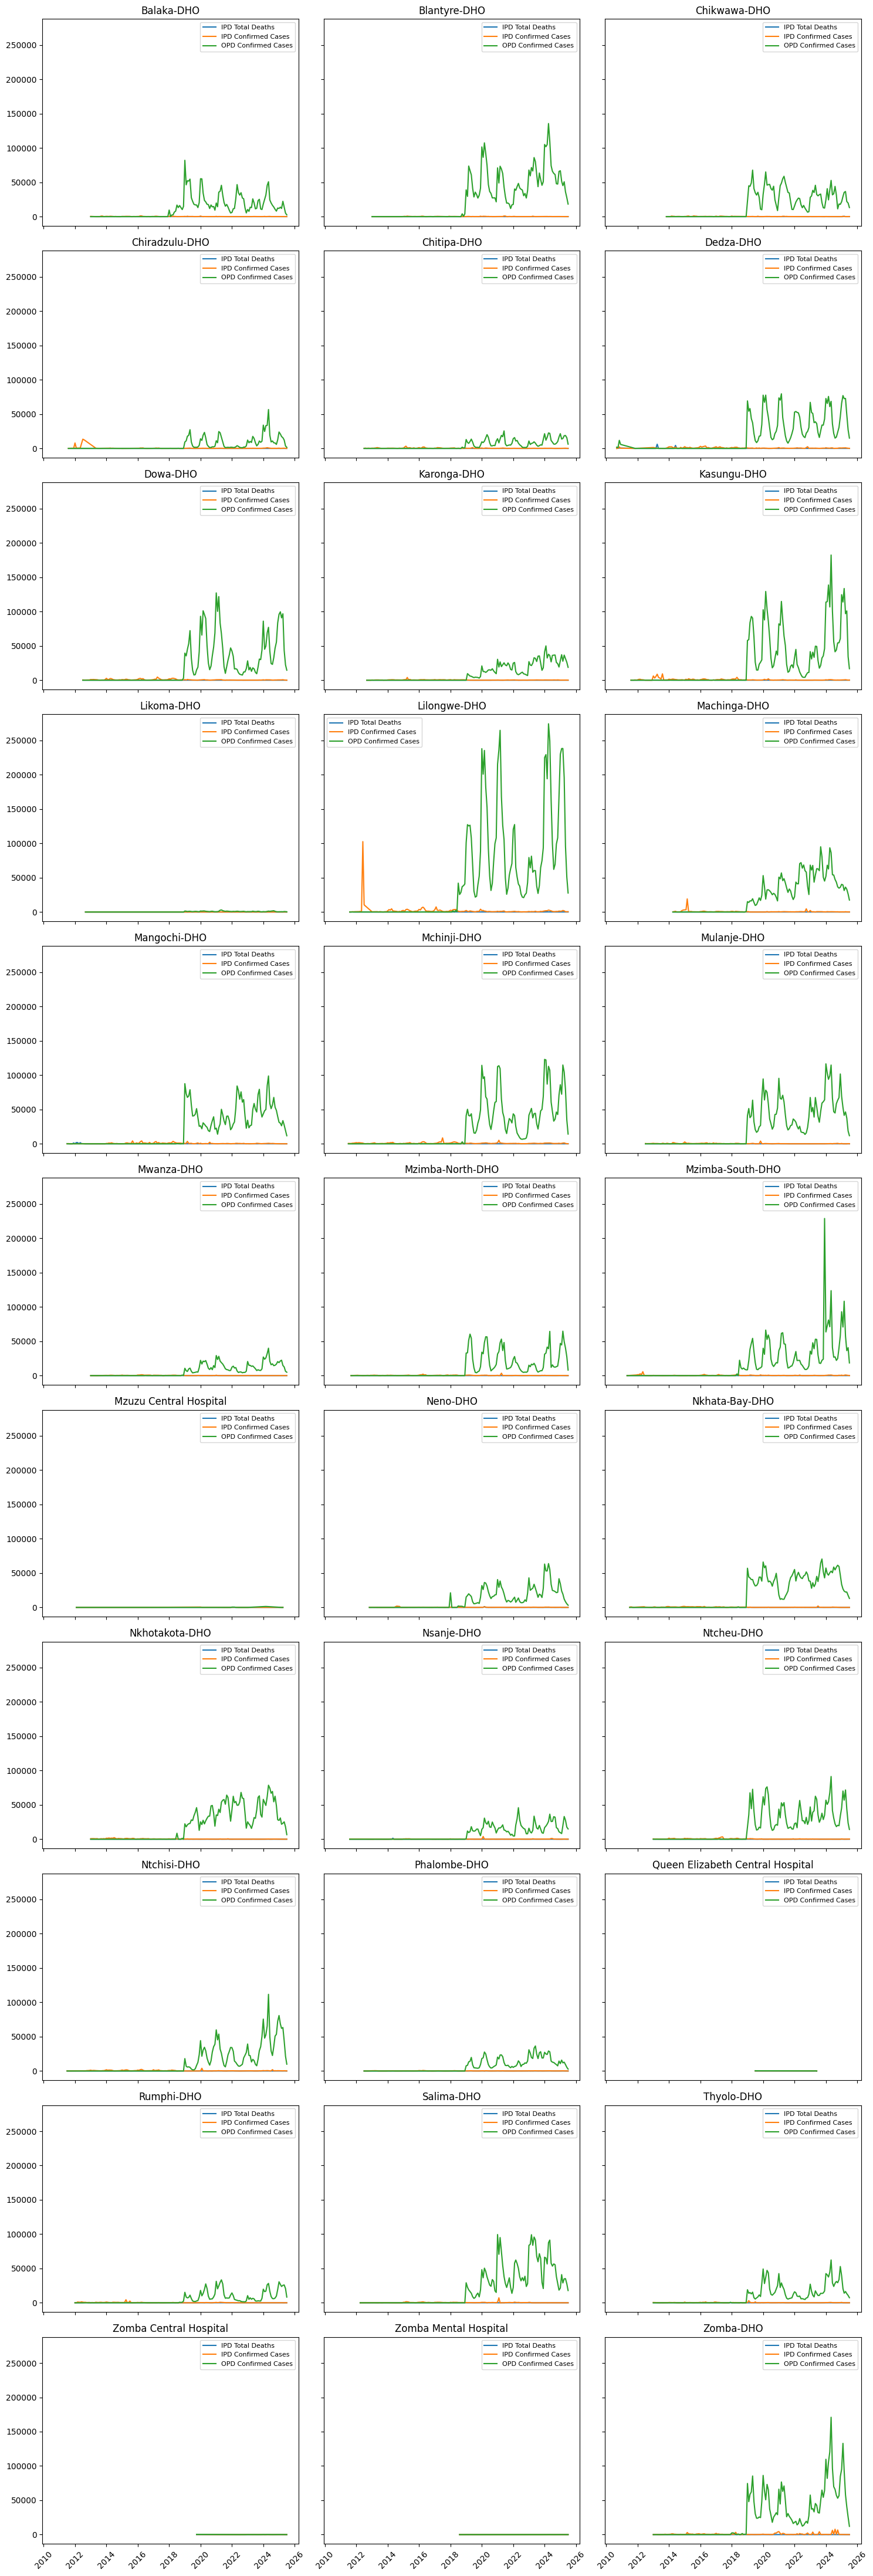

In [42]:

import math

# Ensure monthly_cases is ready
cluster_cases = (
    df_merged_incidence.groupby(
        ['orgunitlevel3', 'Year', 'Month_Num', 'Month'], as_index=False
    ).agg({
        'date_col': 'first',  # keep one date per group
        'NMCP IPD Total Malaria Deaths': 'sum',
        'NMCP IPD Confirmed Malaria Cases': 'sum',
        'NMCP OPD Confirmed Malaria Cases': 'sum'
    }).sort_values(['orgunitlevel3', 'Year', 'Month_Num'])
)

# Get unique clusters
clusters = cluster_cases['orgunitlevel3'].unique()
n_clusters = len(clusters)

# Decide layout (e.g., 3 plots per row)
cols = 3
rows = math.ceil(n_clusters / cols)

fig, axes = plt.subplots(rows, cols, figsize=(5*cols, 4*rows), sharex=True, sharey=True)
axes = axes.flatten()  # flatten 2D array for easy indexing

# Loop through clusters and plot
for i, loc in enumerate(clusters):
    subset = cluster_cases[cluster_cases['orgunitlevel3'] == loc]
    ax = axes[i]
    
    ax.plot(subset['date_col'], subset['NMCP IPD Total Malaria Deaths'], label='IPD Total Deaths')
    ax.plot(subset['date_col'], subset['NMCP IPD Confirmed Malaria Cases'], label='IPD Confirmed Cases')
    ax.plot(subset['date_col'], subset['NMCP OPD Confirmed Malaria Cases'], label='OPD Confirmed Cases')
    
    ax.set_title(loc)
    ax.tick_params(axis='x', rotation=45)
    ax.legend(fontsize=8)

# Remove any empty subplots
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.savefig("malaria_trends.png", dpi=300, bbox_inches="tight")
plt.show()


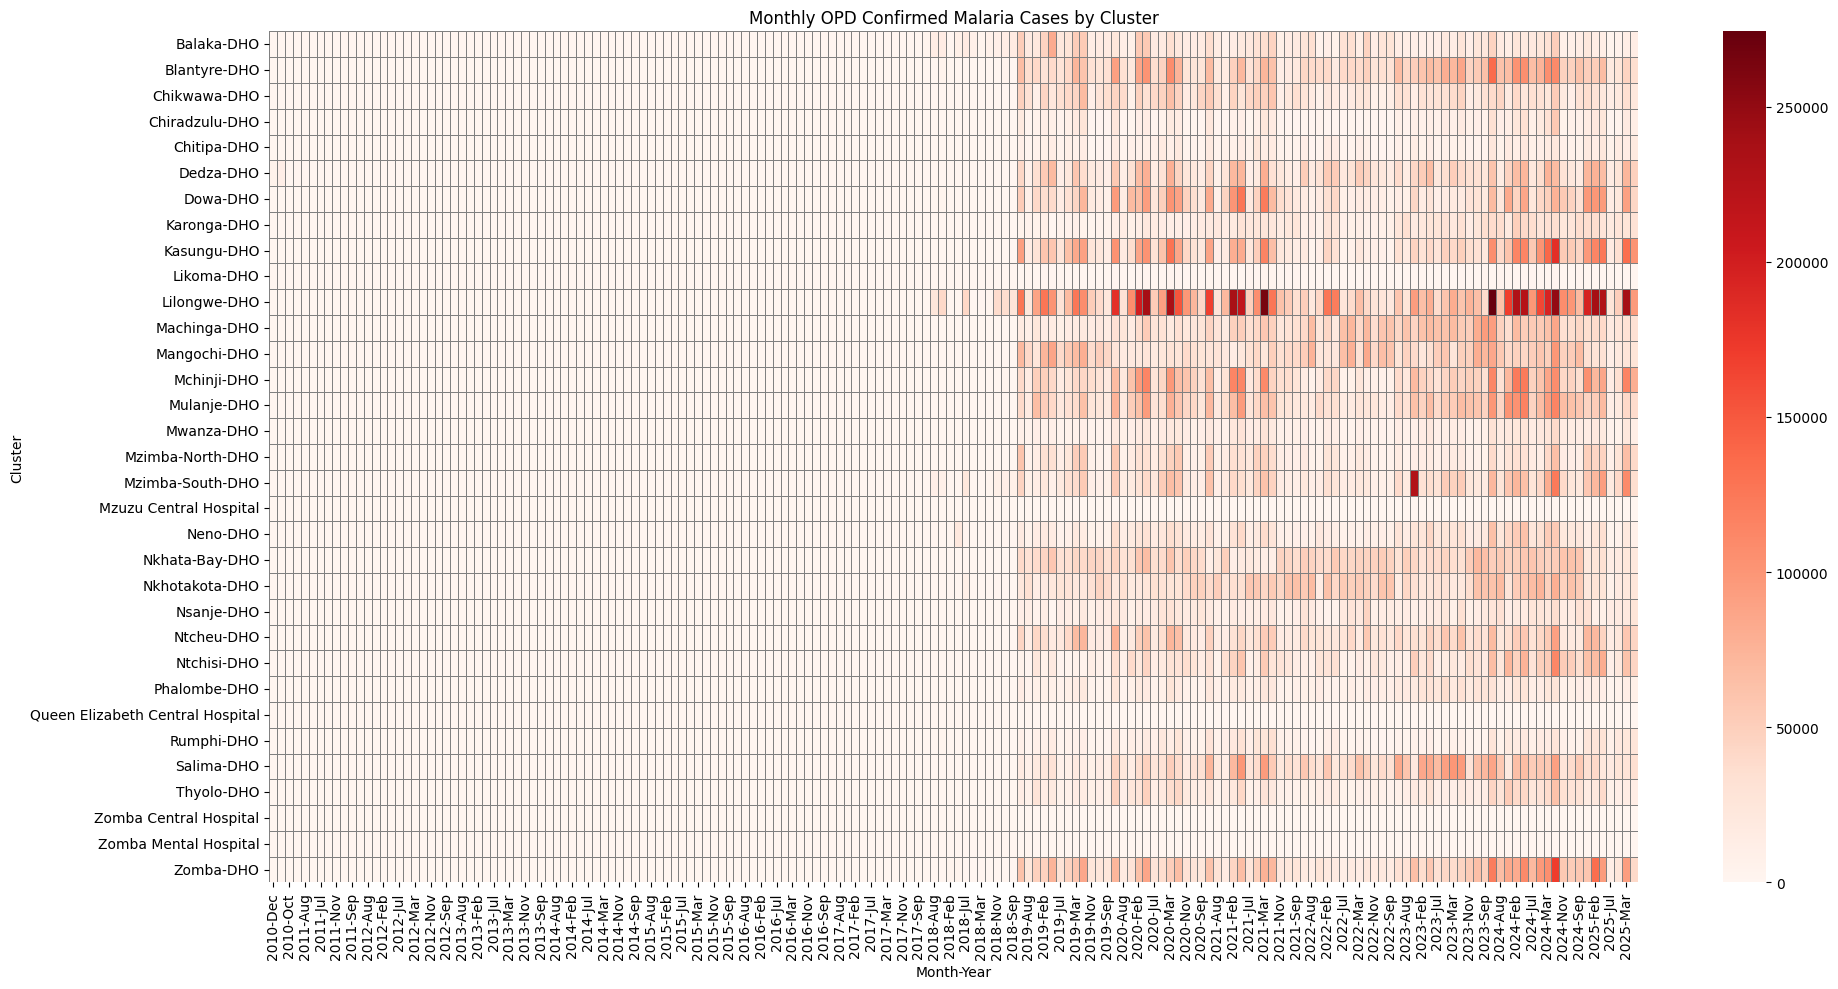

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a Year-Month string for columns
cluster_cases['YearMonth'] = cluster_cases['date_col'].dt.strftime('%Y-%b')

# Pivot the table: rows = clusters, columns = YearMonth, values = OPD confirmed cases
heatmap_data = cluster_cases.pivot_table(
    index='orgunitlevel3',
    columns='YearMonth',
    values='NMCP OPD Confirmed Malaria Cases',
    fill_value=0  # missing months become 0
)

# Plot heatmap
plt.figure(figsize=(20,10))
sns.heatmap(
    heatmap_data,
    cmap='Reds',
    linewidths=0.5,
    linecolor='gray'
)
plt.title('Monthly OPD Confirmed Malaria Cases by Cluster')
plt.xlabel('Month-Year')
plt.ylabel('Cluster')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


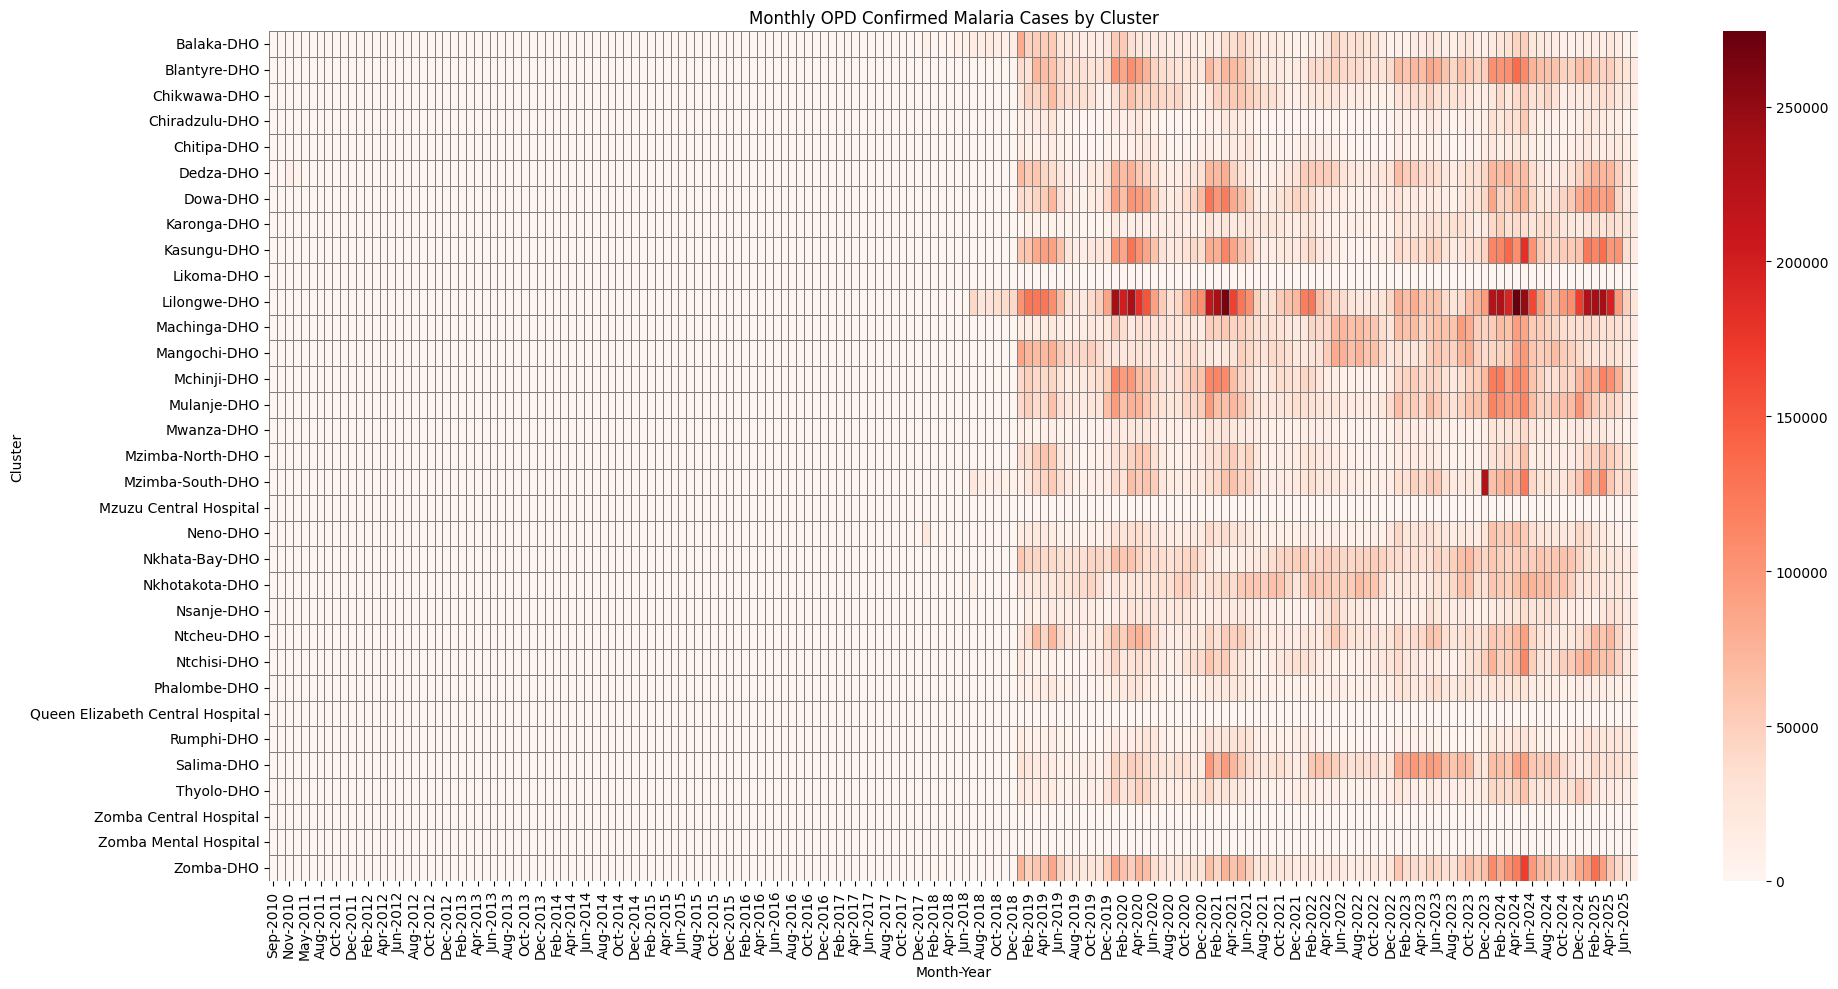

In [48]:


# Create a proper Year-Month column (datetime) for sorting
cluster_cases['YearMonth_dt'] = pd.to_datetime(
    cluster_cases['Year'].astype(str) + '-' + cluster_cases['Month_Num'].astype(str) + '-01'
)

# Pivot table: rows = clusters, columns = YearMonth_dt
heatmap_data = cluster_cases.pivot_table(
    index='orgunitlevel3',
    columns='YearMonth_dt',
    values='NMCP OPD Confirmed Malaria Cases',
    fill_value=0
)

# Sort columns chronologically
heatmap_data = heatmap_data.sort_index(axis=1)

# Convert datetime columns to nice labels for plotting
heatmap_data.columns = heatmap_data.columns.strftime('%b-%Y')

# Plot heatmap
plt.figure(figsize=(20,10))
sns.heatmap(
    heatmap_data,
    cmap='Reds',
    linewidths=0.5,
    linecolor='gray'
)
plt.title('Monthly OPD Confirmed Malaria Cases by Cluster')
plt.xlabel('Month-Year')
plt.ylabel('Cluster')
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig("Heatmap_cluster_incidence.png", dpi=300, bbox_inches="tight")
plt.show()
